# Complete EDA ( Exploratory Data Analysis)

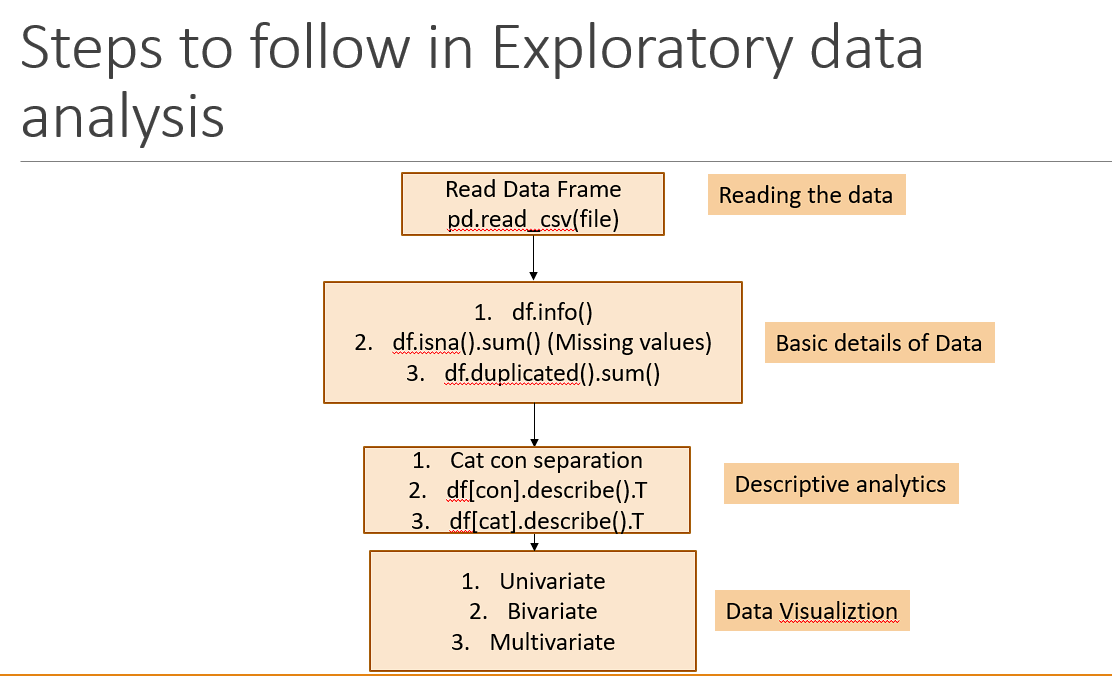

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

## Step 1: Reading the Dataset


In [2]:
import os
os.chdir('D:/Datasets/')

In [3]:
import pandas as pd
df = pd.read_csv('Cars93.csv')

In [4]:
df.head()

id Manufacturer    Model     Type  Min.Price  Price  Max.Price  MPG.city  \
0   1        Acura  Integra    Small       12.9   15.9       18.8        25   
1   2        Acura   Legend  Midsize       29.2   33.9       38.7        18   
2   3         Audi       90  Compact       25.9   29.1       32.3        20   
3   4         Audi      100  Midsize       30.8   37.7       44.6        19   
4   5          BMW     535i  Midsize       23.7   30.0       36.2        22   

   MPG.highway             AirBags  ... Passengers Length  Wheelbase  Width  \
0           31                None  ...          5    177        102     68   
1           25  Driver & Passenger  ...          5    195        115     71   
2           26         Driver only  ...          5    180        102     67   
3           26                 NaN  ...          6    193        106     70   
4           30         Driver only  ...          4    186        109     69   

   Turn.circle  Rear.seat.room Luggage.room  Weight   Origin           Make  
0           37            26.5         11.0    2705  non-USA  Acura Integra  
1           38            30.0         15.0    3560  non-USA   Acura Legend  
2           37            28.0         14.0    3375  non-USA        Audi 90  
3           37            31.0         17.0    3405  non-USA       Audi 100  
4           39            27.0         13.0    3640  non-USA       BMW 535i  

[5 rows x 28 columns]

## Step 2: Get Basic details of dataframe

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  93 non-null     int64  
 1   Manufacturer        93 non-null     object 
 2   Model               93 non-null     object 
 3   Type                93 non-null     object 
 4   Min.Price           93 non-null     float64
 5   Price               93 non-null     float64
 6   Max.Price           93 non-null     float64
 7   MPG.city            93 non-null     int64  
 8   MPG.highway         93 non-null     int64  
 9   AirBags             89 non-null     object 
 10  DriveTrain          93 non-null     object 
 11  Cylinders           93 non-null     object 
 12  EngineSize          93 non-null     float64
 13  Horsepower          93 non-null     int64  
 14  RPM                 93 non-null     int64  
 15  Rev.per.mile        93 non-null     int64  
 16  Man.trans.

## Missinf values in dataframe

In [6]:
s = df.isna().sum()
s

id                     0
Manufacturer           0
Model                  0
Type                   0
Min.Price              0
Price                  0
Max.Price              0
MPG.city               0
MPG.highway            0
AirBags                4
DriveTrain             0
Cylinders              0
EngineSize             0
Horsepower             0
RPM                    0
Rev.per.mile           0
Man.trans.avail        0
Fuel.tank.capacity     0
Passengers             0
Length                 0
Wheelbase              0
Width                  0
Turn.circle            0
Rear.seat.room         2
Luggage.room          11
Weight                 0
Origin                 0
Make                   0
dtype: int64

In [7]:
s[s>0]

AirBags            4
Rear.seat.room     2
Luggage.room      11
dtype: int64

## Checking duplicate values in dataframe


In [8]:
df.duplicated().sum()

0

## Step 3: Descriptive analytics

## Drop statiscally insignificant column(id)

In [9]:
df = df.drop(columns=['id'])
df.head()

Manufacturer    Model     Type  Min.Price  Price  Max.Price  MPG.city  \
0        Acura  Integra    Small       12.9   15.9       18.8        25   
1        Acura   Legend  Midsize       29.2   33.9       38.7        18   
2         Audi       90  Compact       25.9   29.1       32.3        20   
3         Audi      100  Midsize       30.8   37.7       44.6        19   
4          BMW     535i  Midsize       23.7   30.0       36.2        22   

   MPG.highway             AirBags DriveTrain  ... Passengers  Length  \
0           31                None      Front  ...          5     177   
1           25  Driver & Passenger      Front  ...          5     195   
2           26         Driver only      Front  ...          5     180   
3           26                 NaN      Front  ...          6     193   
4           30         Driver only       Rear  ...          4     186   

   Wheelbase  Width  Turn.circle Rear.seat.room  Luggage.room  Weight  \
0        102     68           37           26.5          11.0    2705   
1        115     71           38           30.0          15.0    3560   
2        102     67           37           28.0          14.0    3375   
3        106     70           37           31.0          17.0    3405   
4        109     69           39           27.0          13.0    3640   

    Origin           Make  
0  non-USA  Acura Integra  
1  non-USA   Acura Legend  
2  non-USA        Audi 90  
3  non-USA       Audi 100  
4  non-USA       BMW 535i  

[5 rows x 27 columns]

## Cat, Con sepration

In [10]:
df.columns

Index(['Manufacturer', 'Model', 'Type', 'Min.Price', 'Price', 'Max.Price',
       'MPG.city', 'MPG.highway', 'AirBags', 'DriveTrain', 'Cylinders',
       'EngineSize', 'Horsepower', 'RPM', 'Rev.per.mile', 'Man.trans.avail',
       'Fuel.tank.capacity', 'Passengers', 'Length', 'Wheelbase', 'Width',
       'Turn.circle', 'Rear.seat.room', 'Luggage.room', 'Weight', 'Origin',
       'Make'],
      dtype='object')

In [11]:
cat = list(df.columns[df.dtypes=='object'])
con = list(df.columns[df.dtypes!='object'])

In [12]:
cat

['Manufacturer',
 'Model',
 'Type',
 'AirBags',
 'DriveTrain',
 'Cylinders',
 'Man.trans.avail',
 'Origin',
 'Make']

In [13]:
con

['Min.Price',
 'Price',
 'Max.Price',
 'MPG.city',
 'MPG.highway',
 'EngineSize',
 'Horsepower',
 'RPM',
 'Rev.per.mile',
 'Fuel.tank.capacity',
 'Passengers',
 'Length',
 'Wheelbase',
 'Width',
 'Turn.circle',
 'Rear.seat.room',
 'Luggage.room',
 'Weight']

In [14]:
df[cat].describe().T

count unique            top freq
Manufacturer       93     32      Chevrolet    8
Model              93     93        Integra    1
Type               93      6        Midsize   22
AirBags            89      3    Driver only   42
DriveTrain         93      3          Front   67
Cylinders          93      6              4   49
Man.trans.avail    93      2            Yes   61
Origin             93      2            USA   48
Make               93     93  Acura Integra    1

In [15]:
df['Cylinders'].value_counts()

4         49
6         31
8          7
3          3
5          2
rotary     1
Name: Cylinders, dtype: int64

In [16]:
df[con].describe().T

count         mean         std     min     25%     50%  \
Min.Price            93.0    17.125806    8.746029     6.7    10.8    14.7   
Price                93.0    19.509677    9.659430     7.4    12.2    17.7   
Max.Price            93.0    21.898925   11.030457     7.9    14.7    19.6   
MPG.city             93.0    22.365591    5.619812    15.0    18.0    21.0   
MPG.highway          93.0    29.086022    5.331726    20.0    26.0    28.0   
EngineSize           93.0     2.667742    1.037363     1.0     1.8     2.4   
Horsepower           93.0   143.827957   52.374410    55.0   103.0   140.0   
RPM                  93.0  5280.645161  596.731690  3800.0  4800.0  5200.0   
Rev.per.mile         93.0  2332.204301  496.506525  1320.0  1985.0  2340.0   
Fuel.tank.capacity   93.0    16.664516    3.279370     9.2    14.5    16.4   
Passengers           93.0     5.086022    1.038979     2.0     4.0     5.0   
Length               93.0   183.204301   14.602382   141.0   174.0   183.0   
Wheelbase            93.0   103.946237    6.819674    90.0    98.0   103.0   
Width                93.0    69.376344    3.778986    60.0    67.0    69.0   
Turn.circle          93.0    38.956989    3.223265    32.0    37.0    39.0   
Rear.seat.room       91.0    27.829670    2.989072    19.0    26.0    27.5   
Luggage.room         82.0    13.890244    2.997967     6.0    12.0    14.0   
Weight               93.0  3072.903226  589.896510  1695.0  2620.0  3040.0   

                       75%     max  
Min.Price             20.3    45.4  
Price                 23.3    61.9  
Max.Price             25.3    80.0  
MPG.city              25.0    46.0  
MPG.highway           31.0    50.0  
EngineSize             3.3     5.7  
Horsepower           170.0   300.0  
RPM                 5750.0  6500.0  
Rev.per.mile        2565.0  3755.0  
Fuel.tank.capacity    18.8    27.0  
Passengers             6.0     8.0  
Length               192.0   219.0  
Wheelbase            110.0   119.0  
Width                 72.0    78.0  
Turn.circle           41.0    45.0  
Rear.seat.room        30.0    36.0  
Luggage.room          15.0    22.0  
Weight              3525.0  4105.0

# Step 4: Univariate Analysis

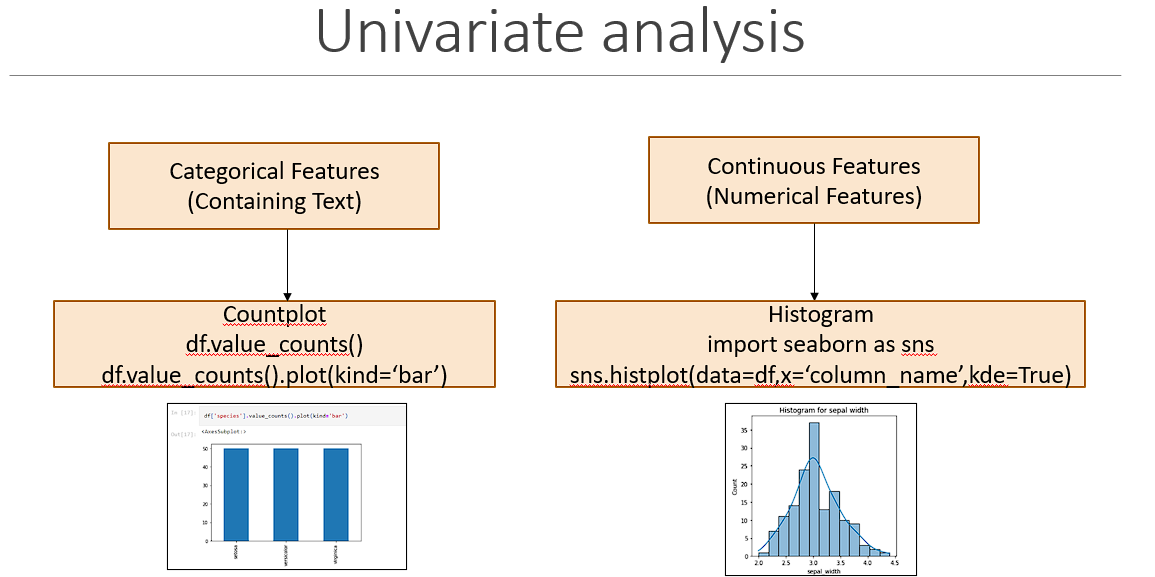

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
cat

['Manufacturer',
 'Model',
 'Type',
 'AirBags',
 'DriveTrain',
 'Cylinders',
 'Man.trans.avail',
 'Origin',
 'Make']

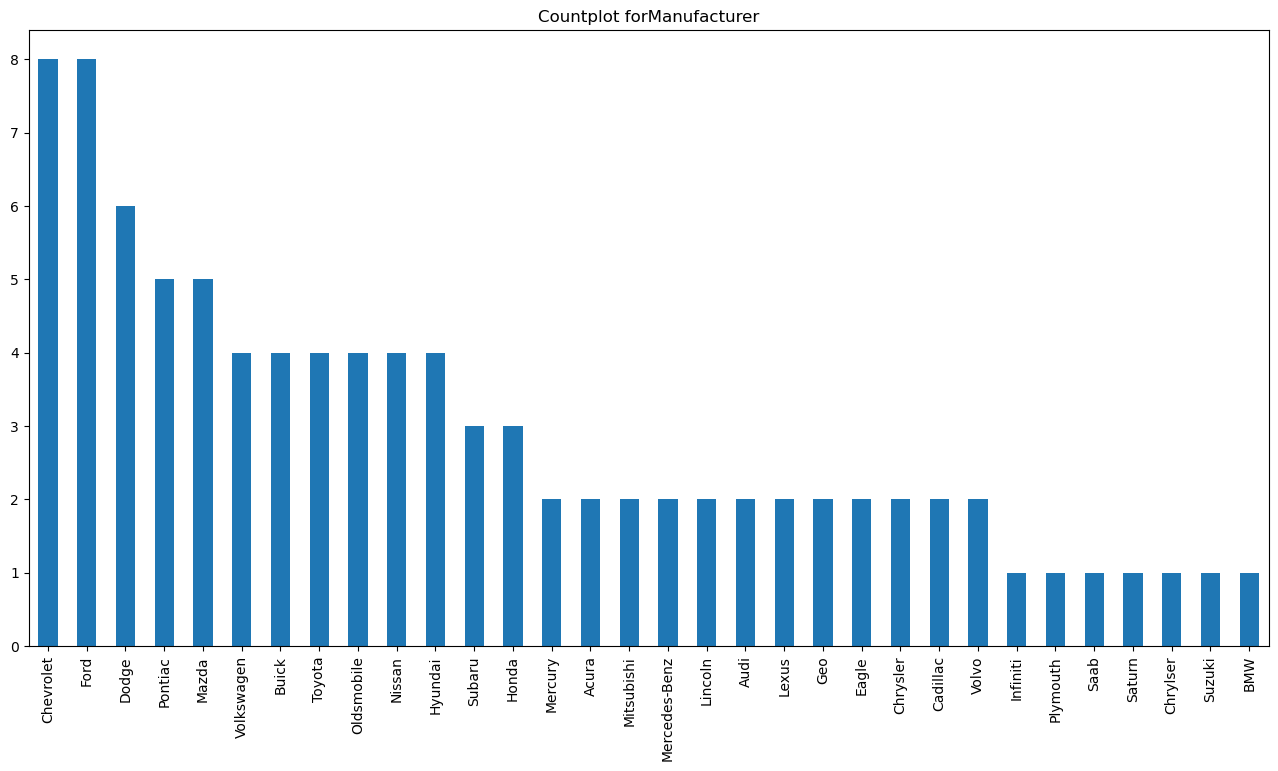

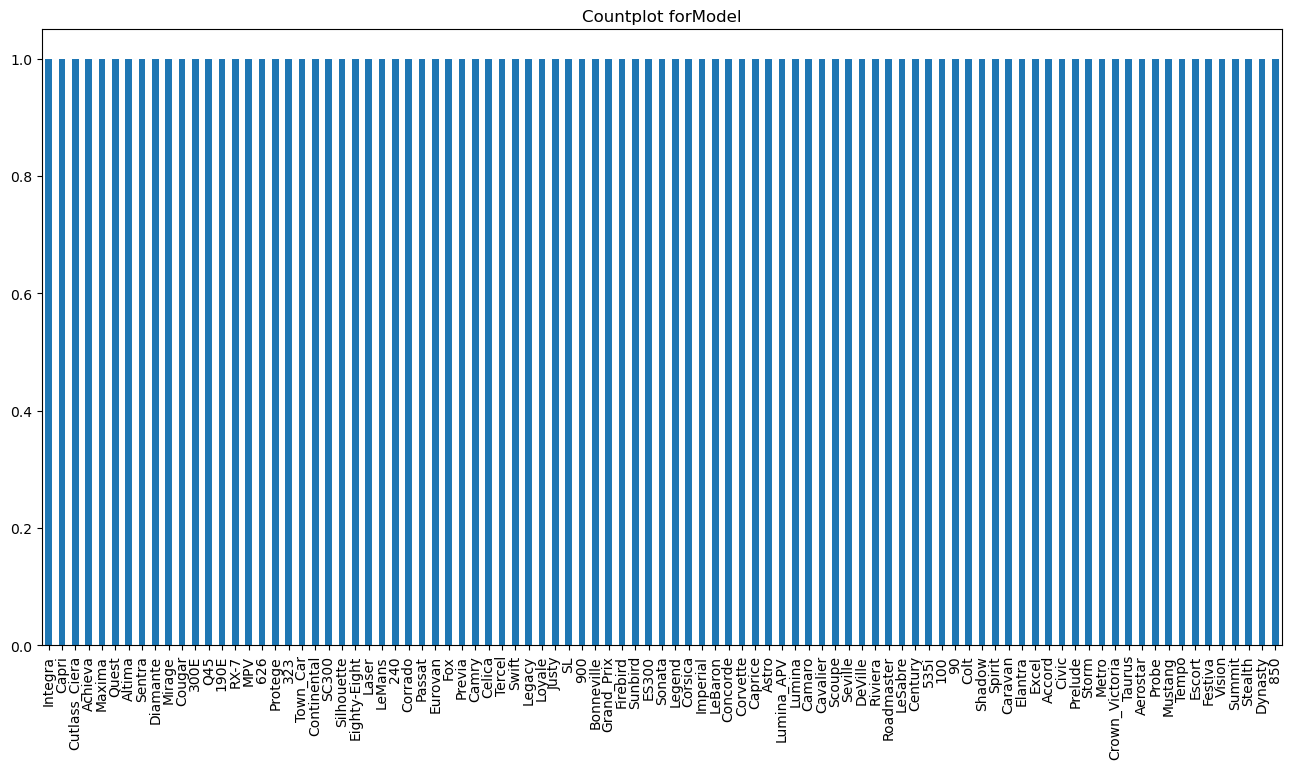

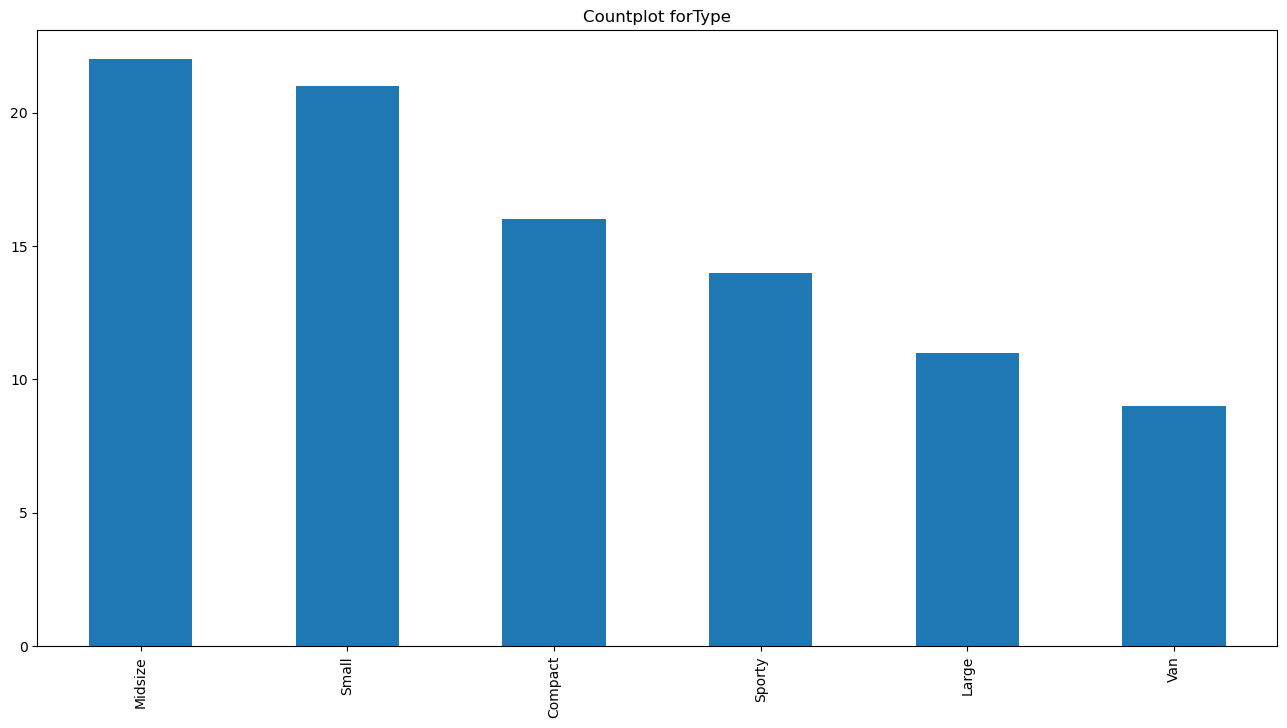

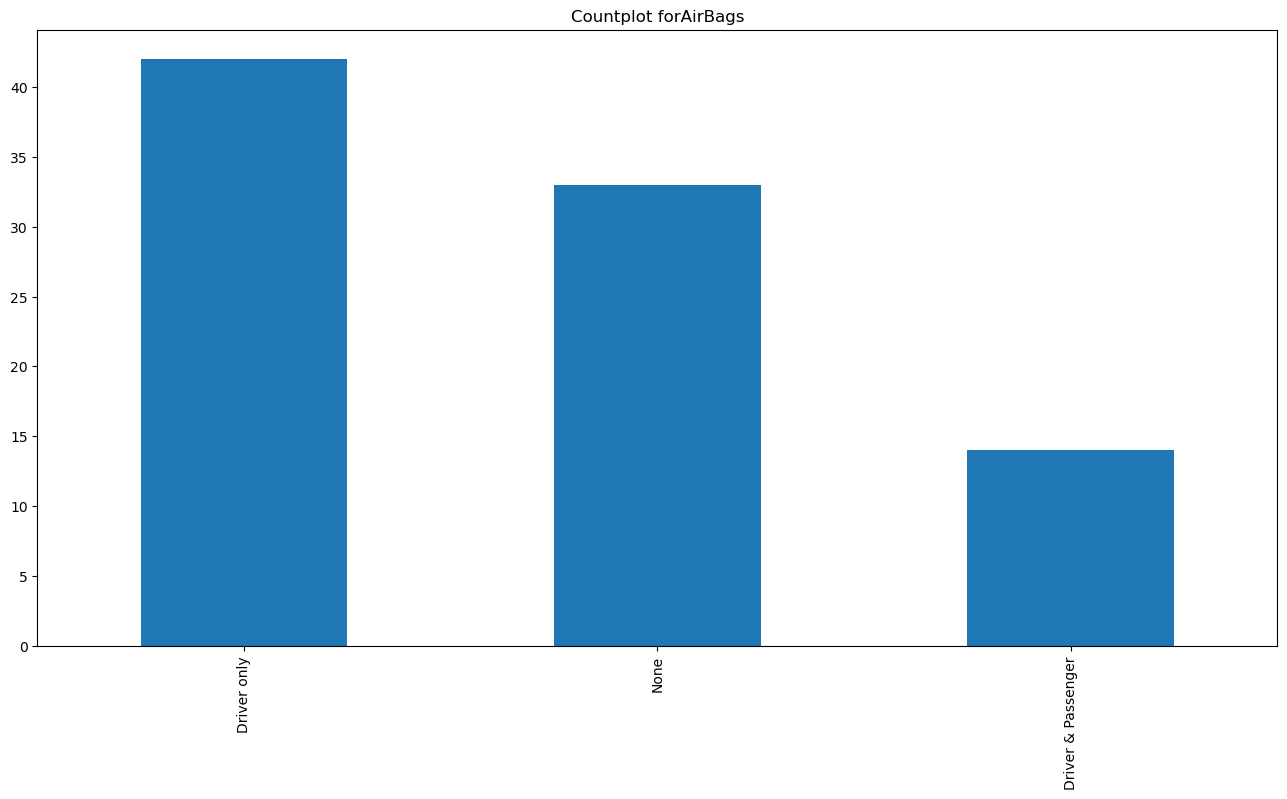

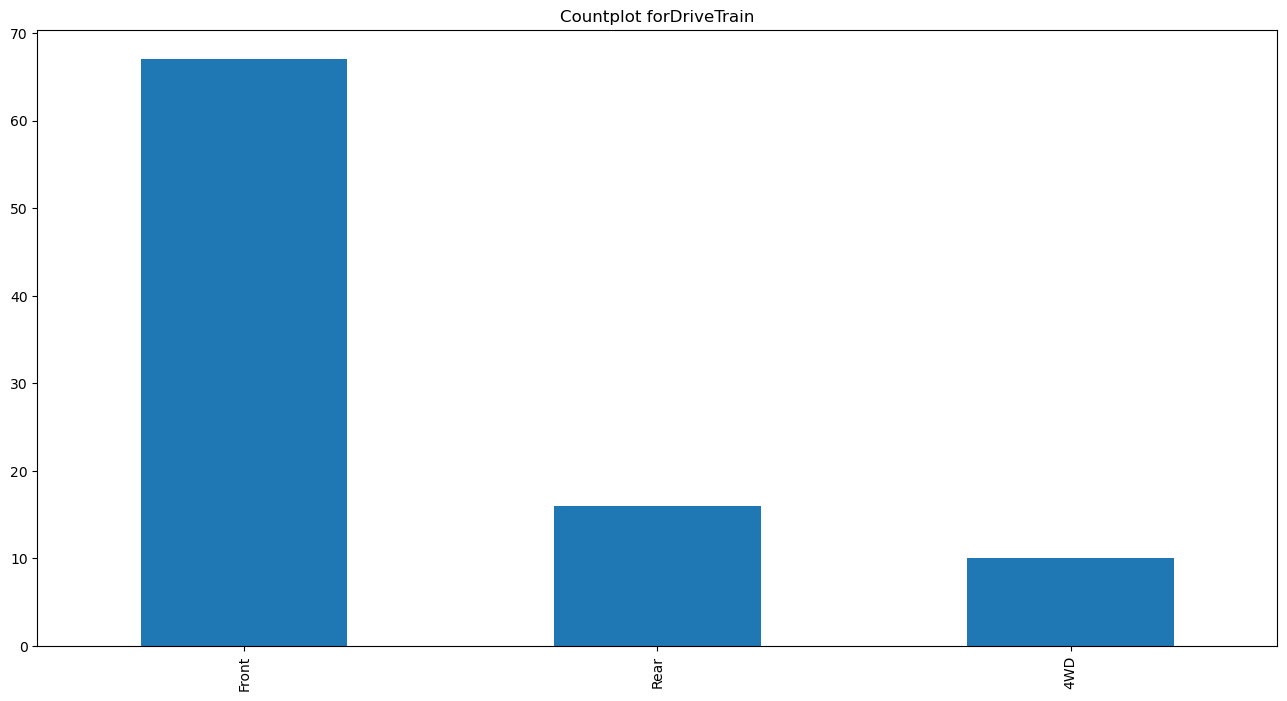

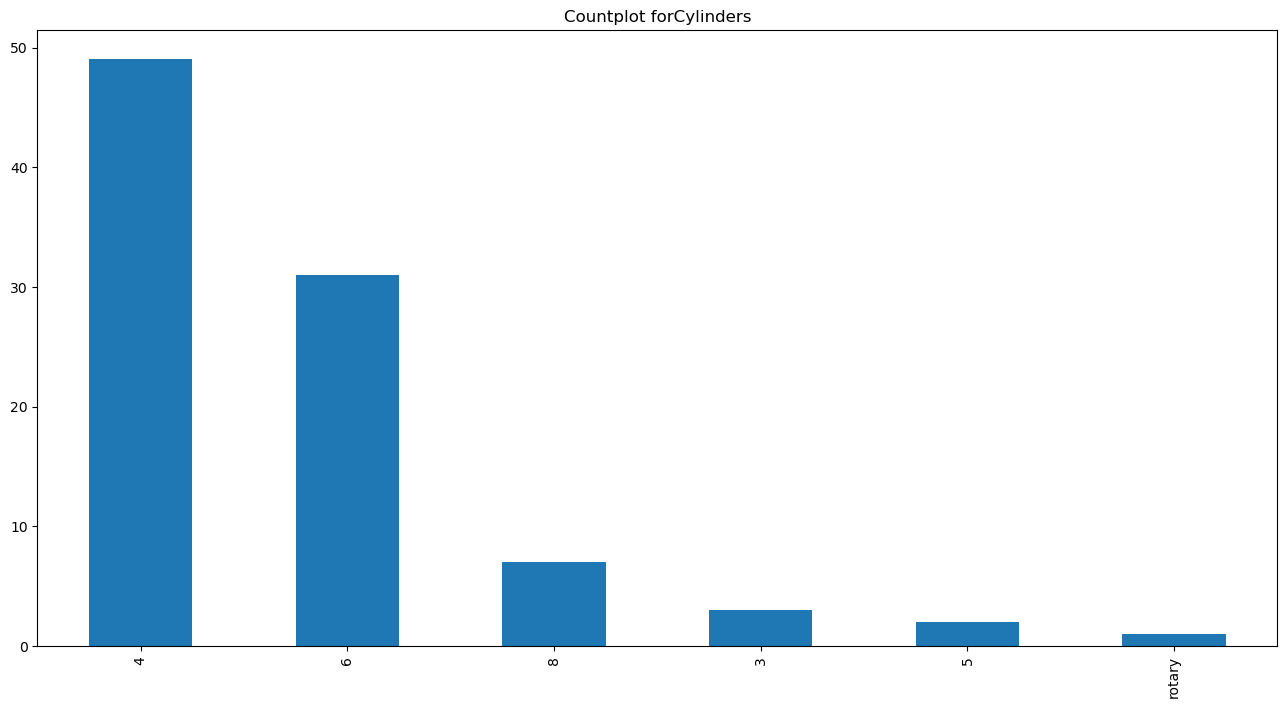

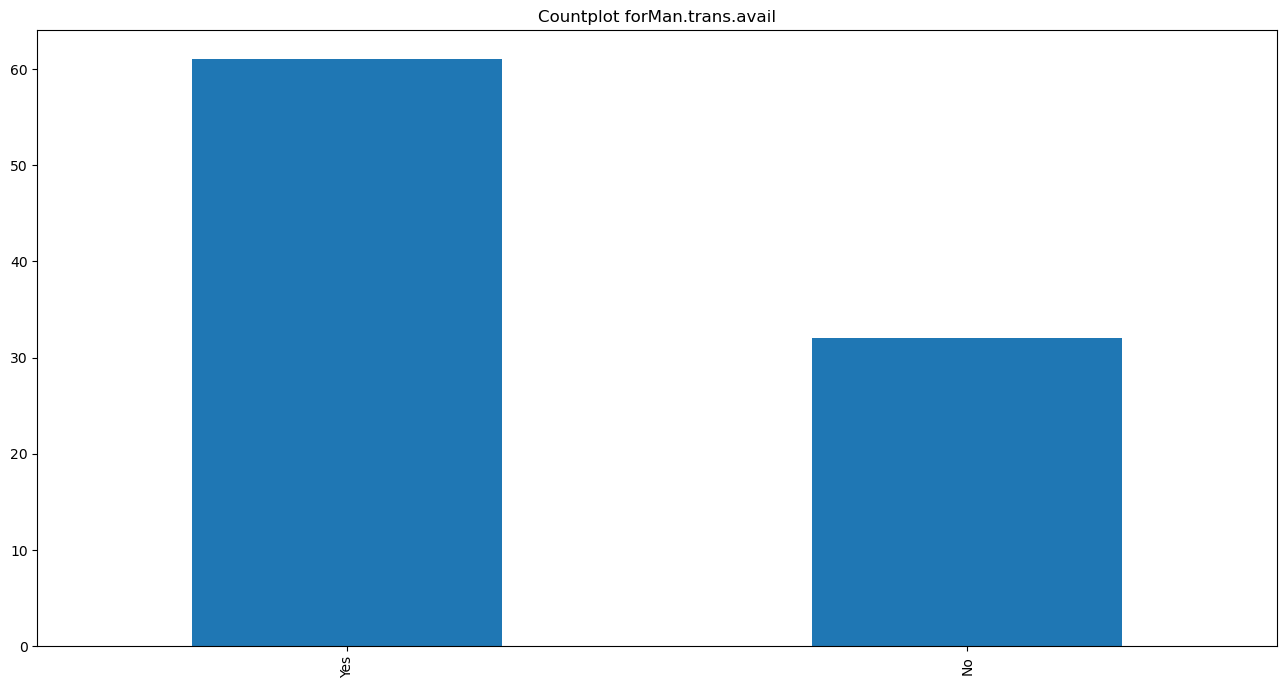

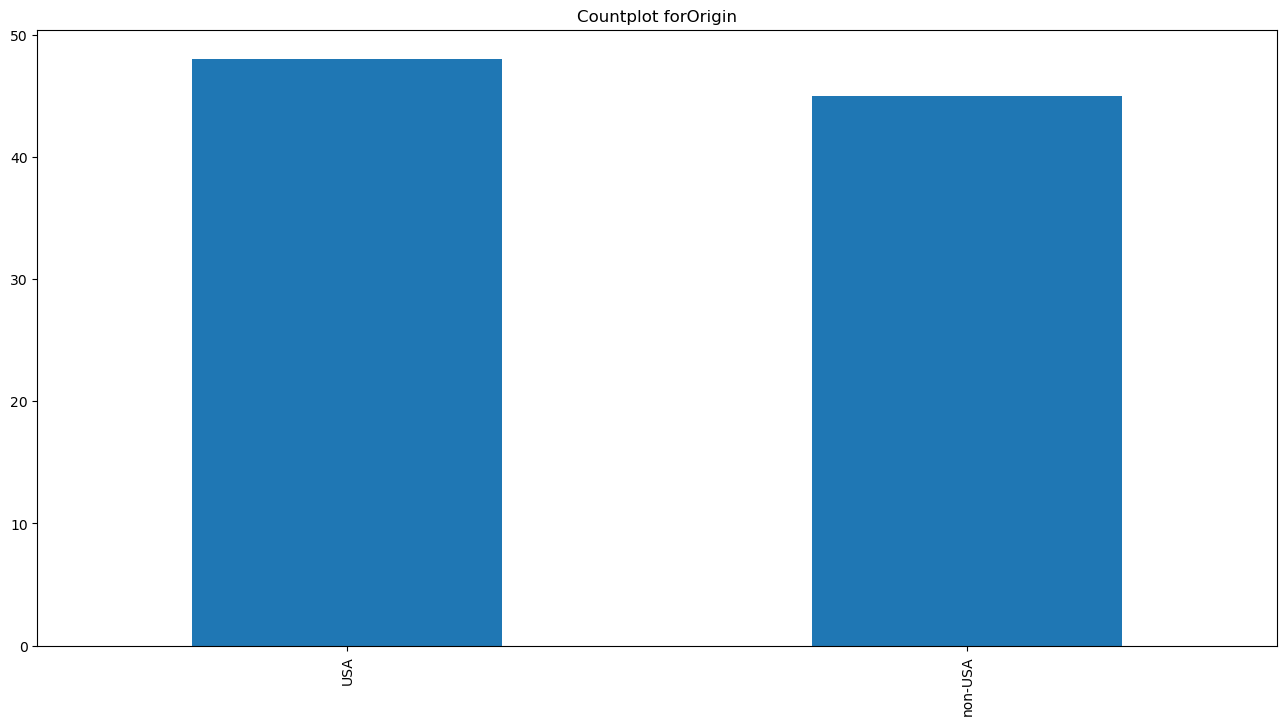

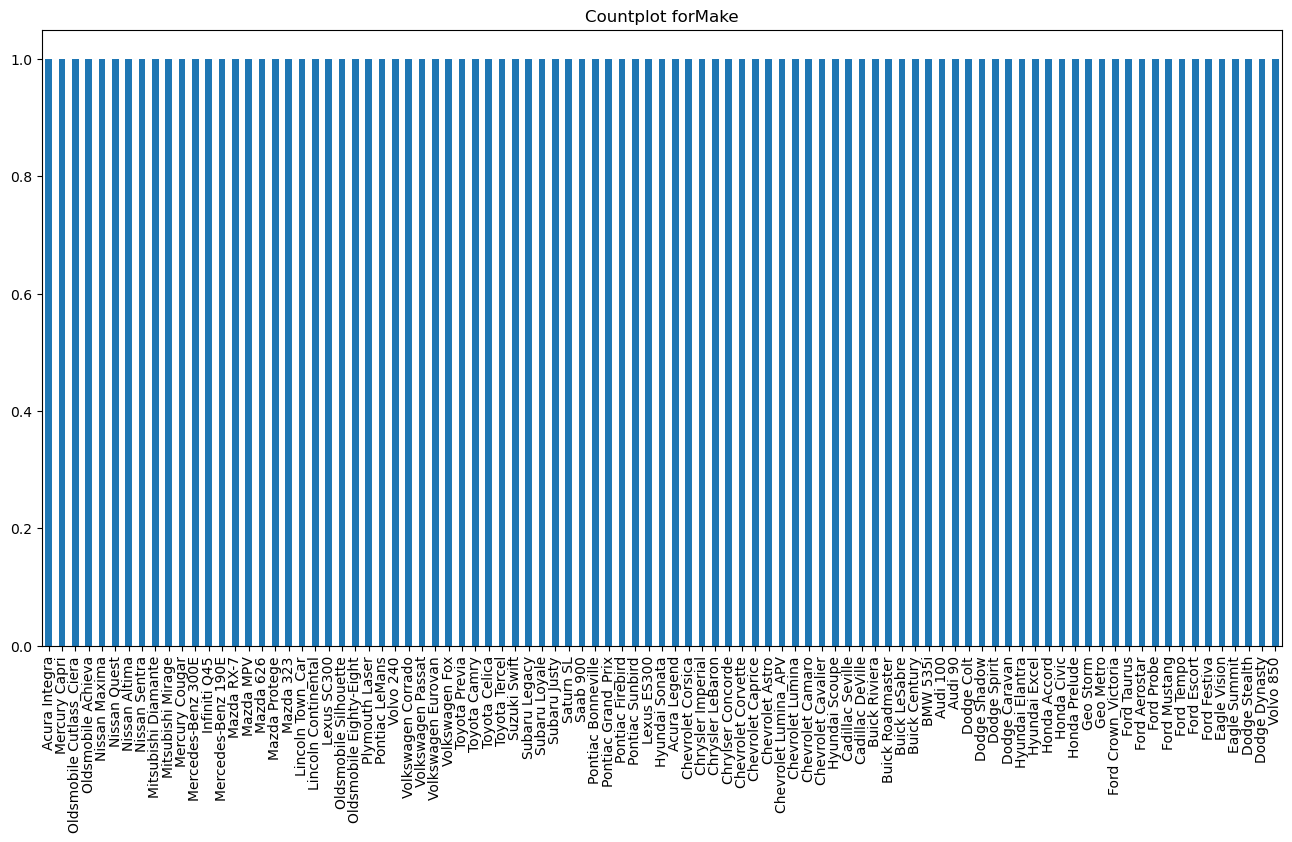

In [19]:
for i in cat:
    df[i].value_counts().plot(kind='bar',
                             title=f'Countplot for{i}',
                             figsize=(16,8))
    plt.show()

In [20]:
con

['Min.Price',
 'Price',
 'Max.Price',
 'MPG.city',
 'MPG.highway',
 'EngineSize',
 'Horsepower',
 'RPM',
 'Rev.per.mile',
 'Fuel.tank.capacity',
 'Passengers',
 'Length',
 'Wheelbase',
 'Width',
 'Turn.circle',
 'Rear.seat.room',
 'Luggage.room',
 'Weight']

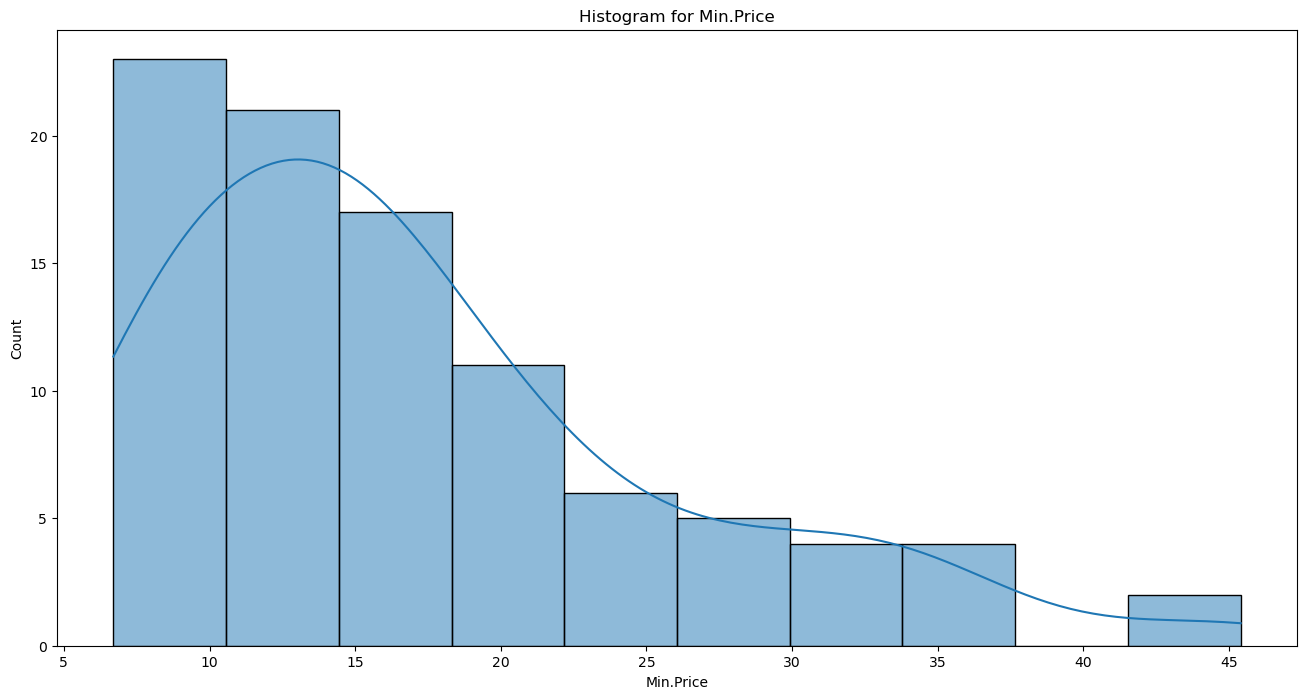

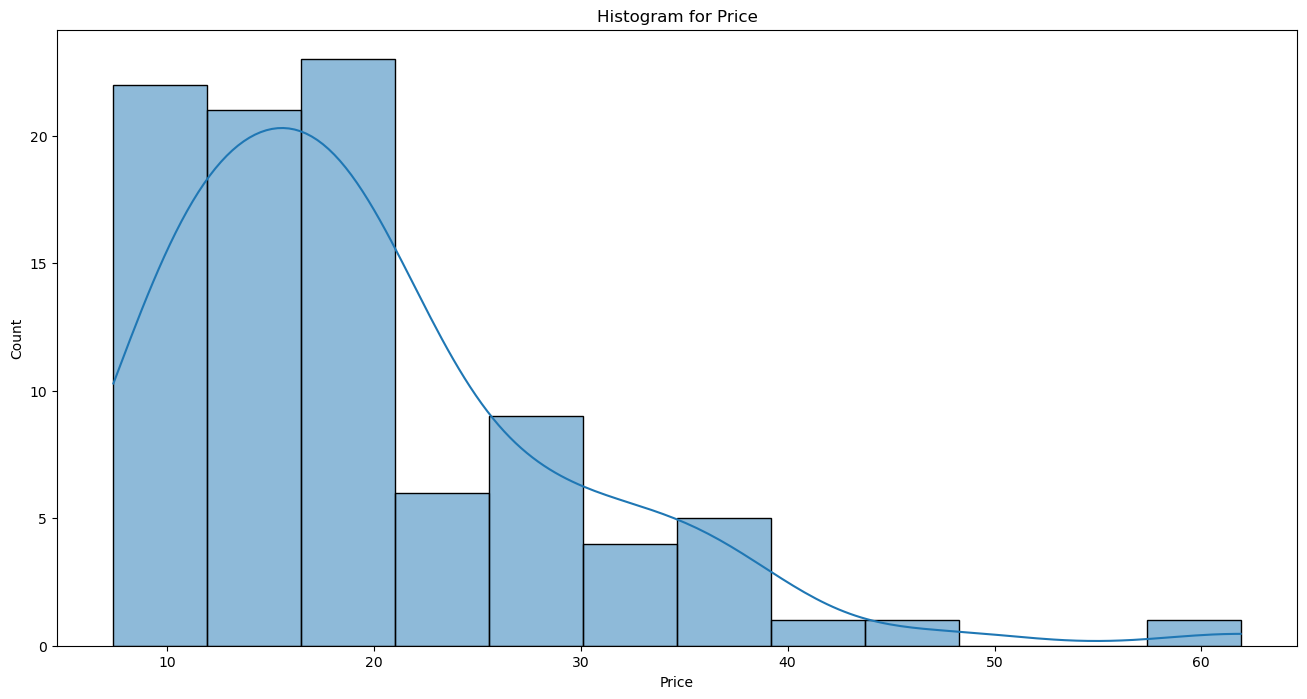

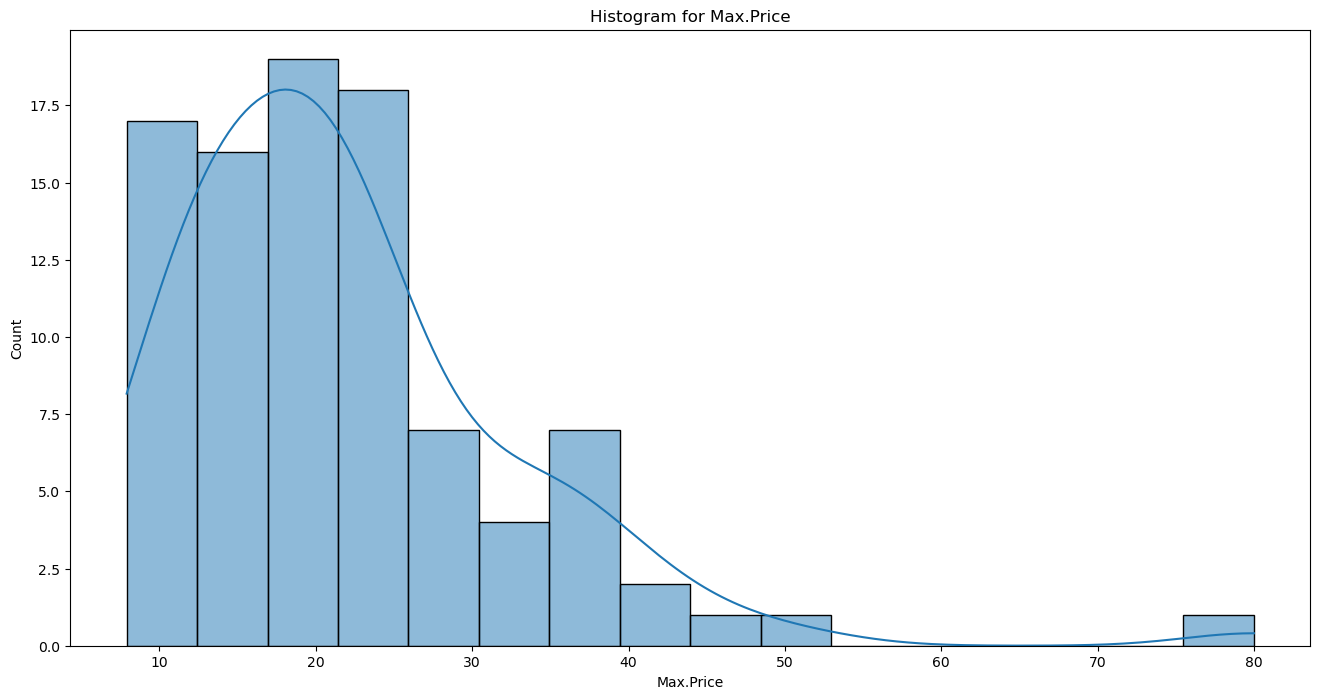

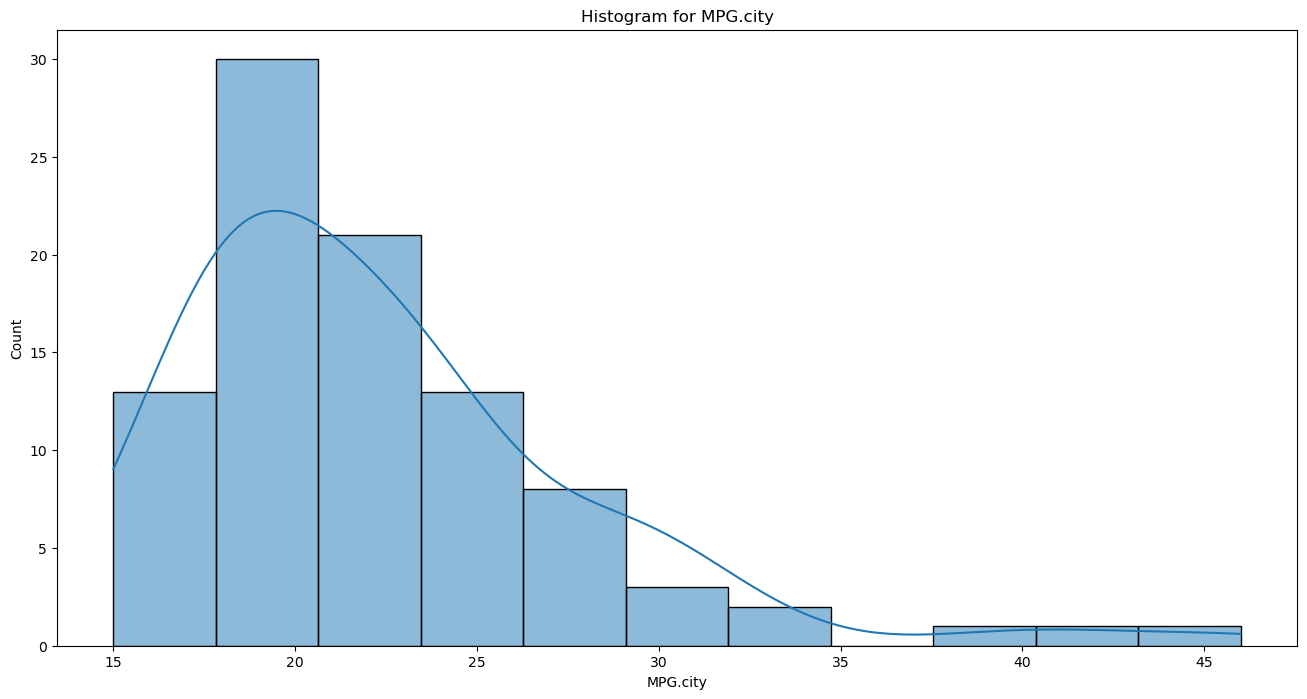

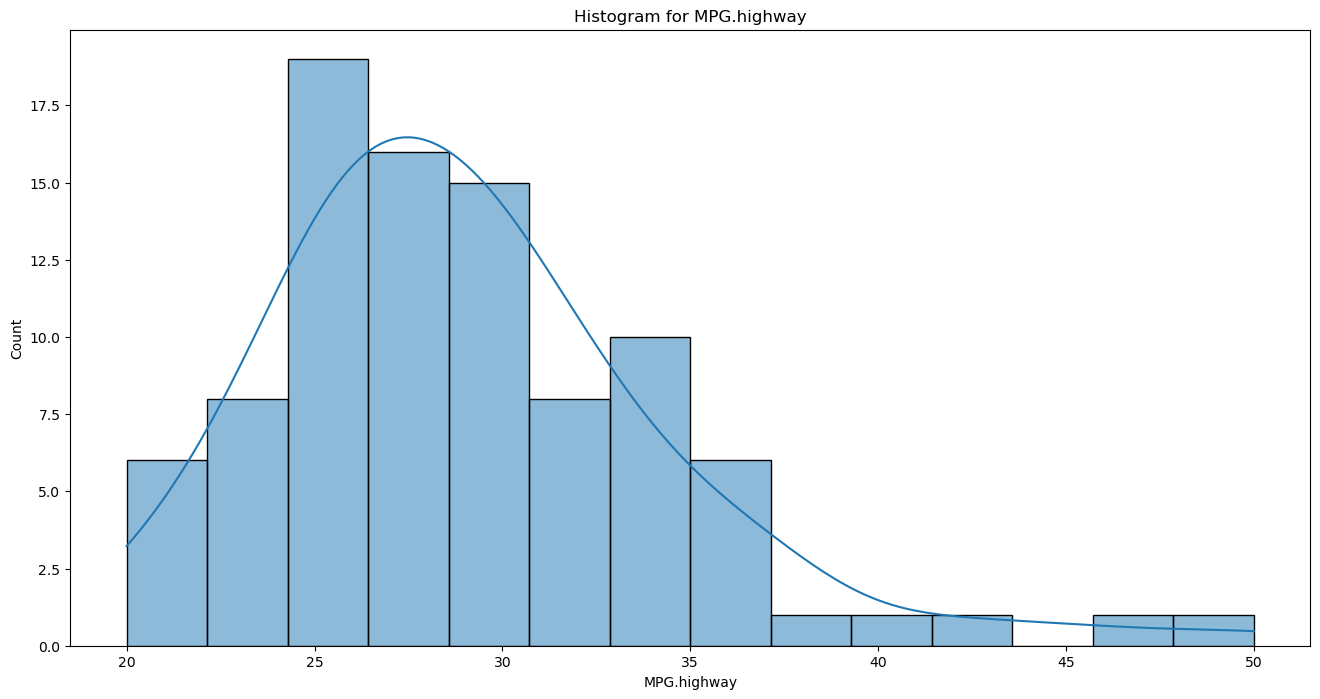

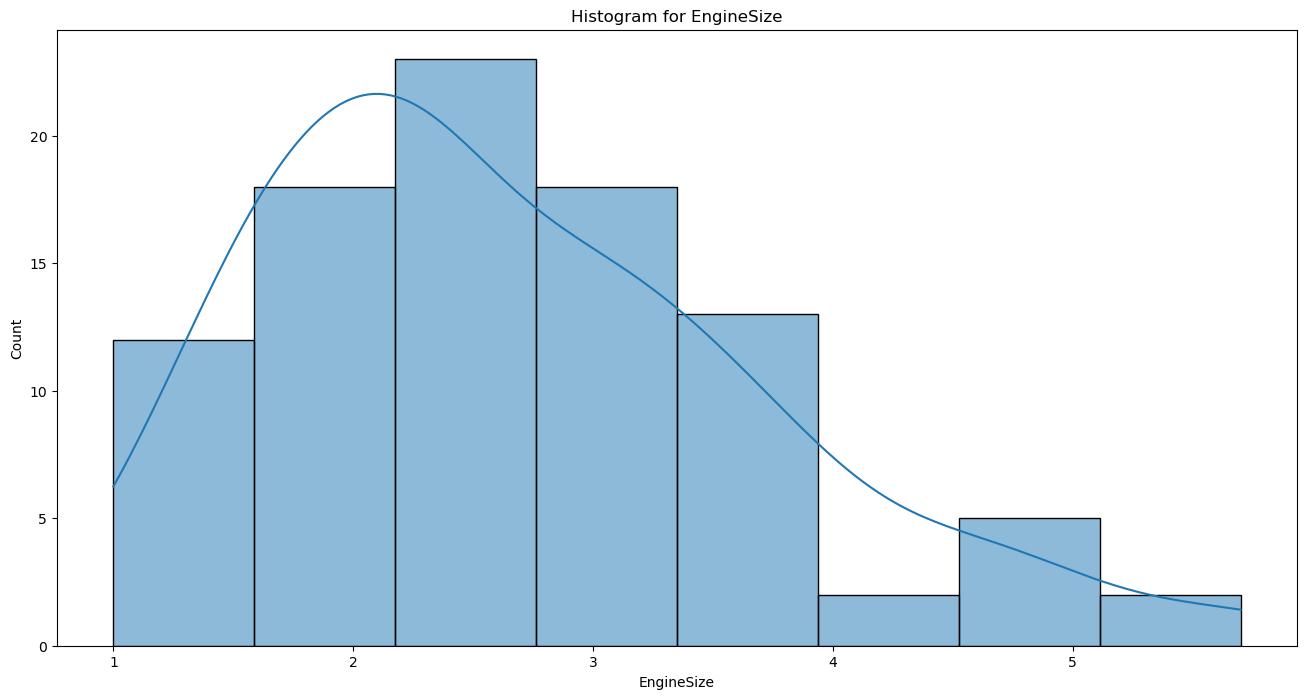

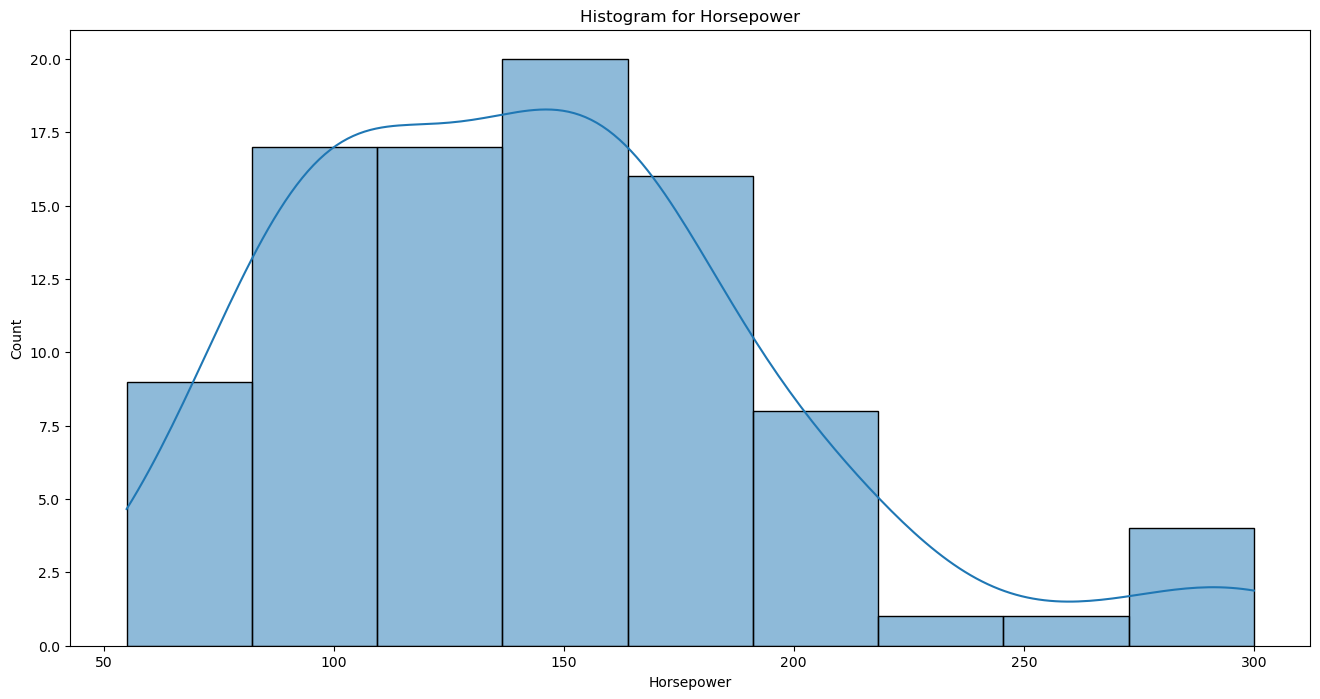

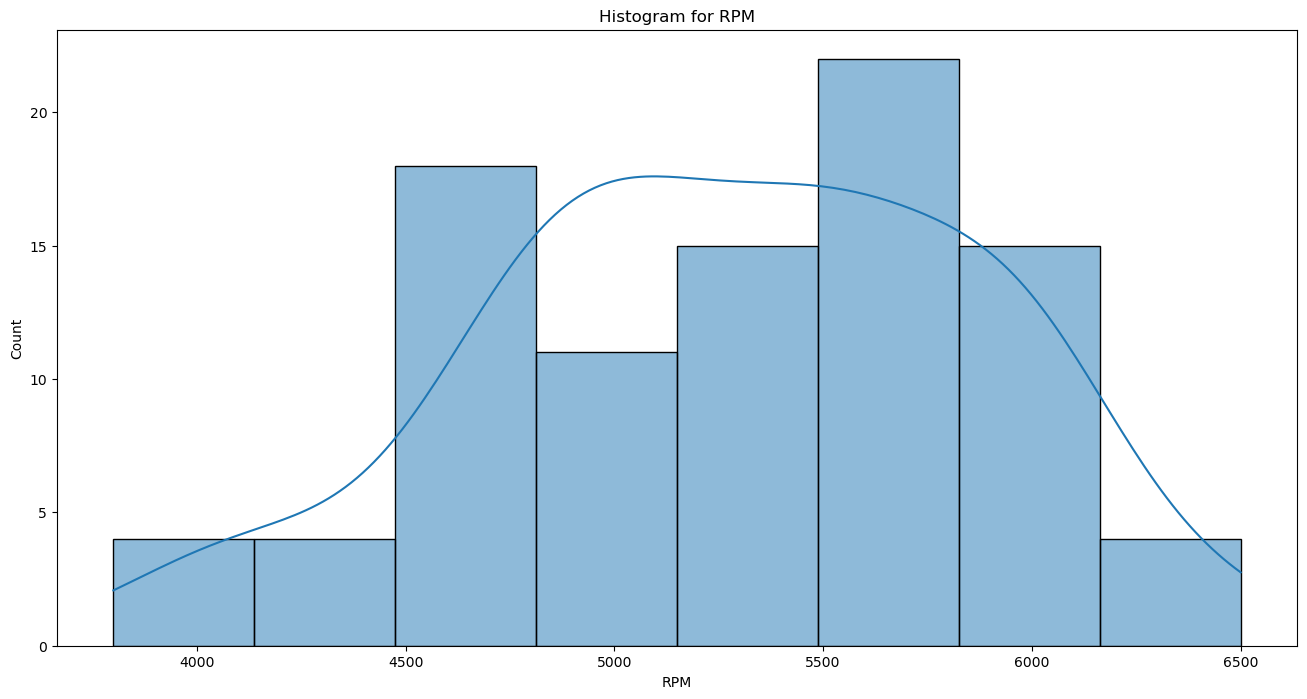

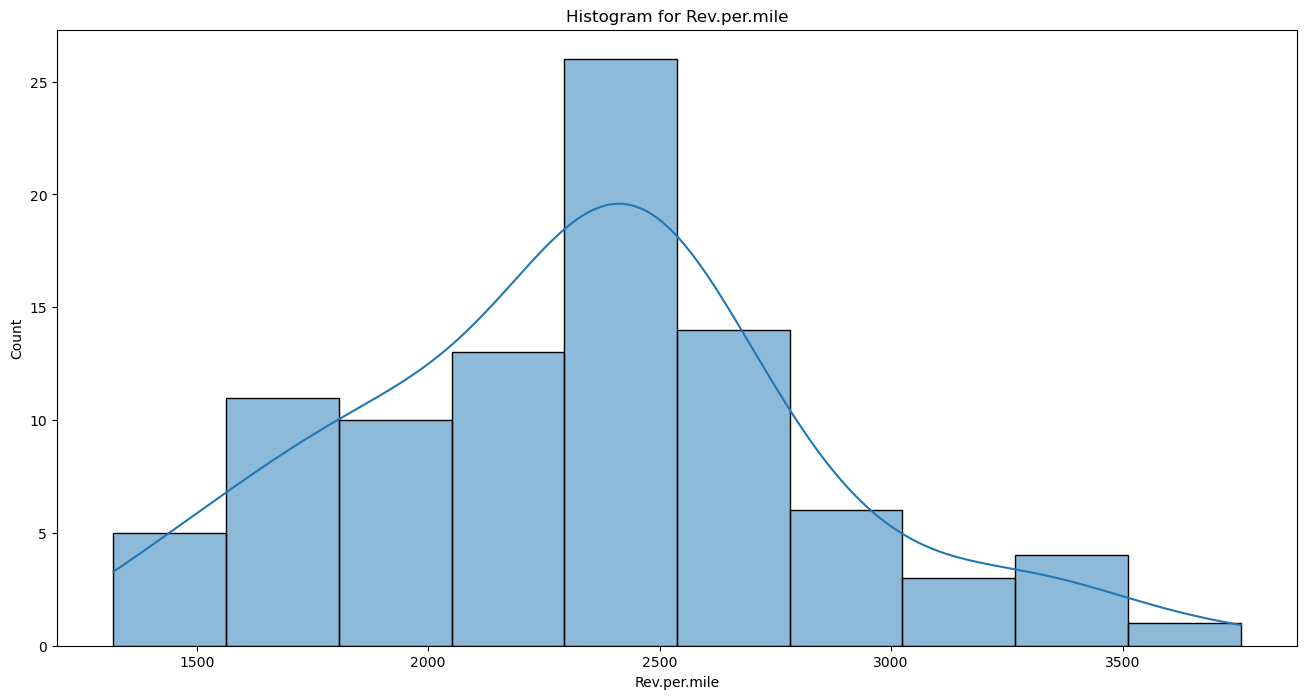

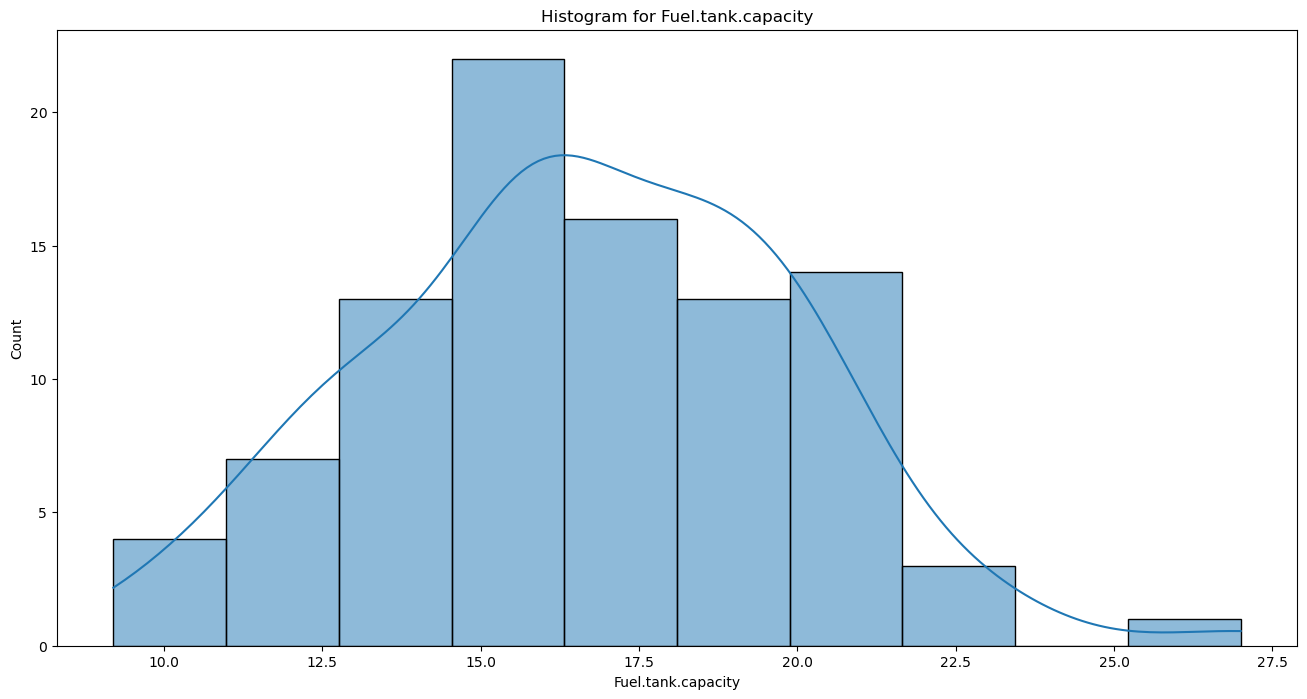

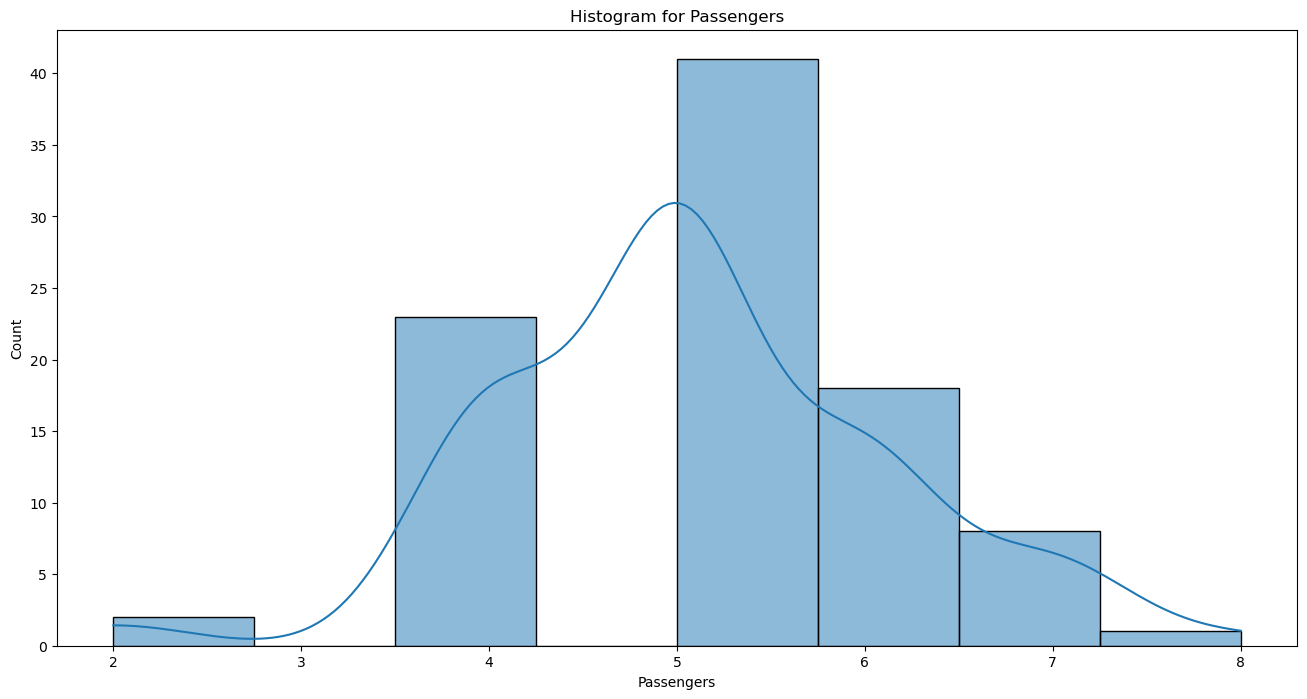

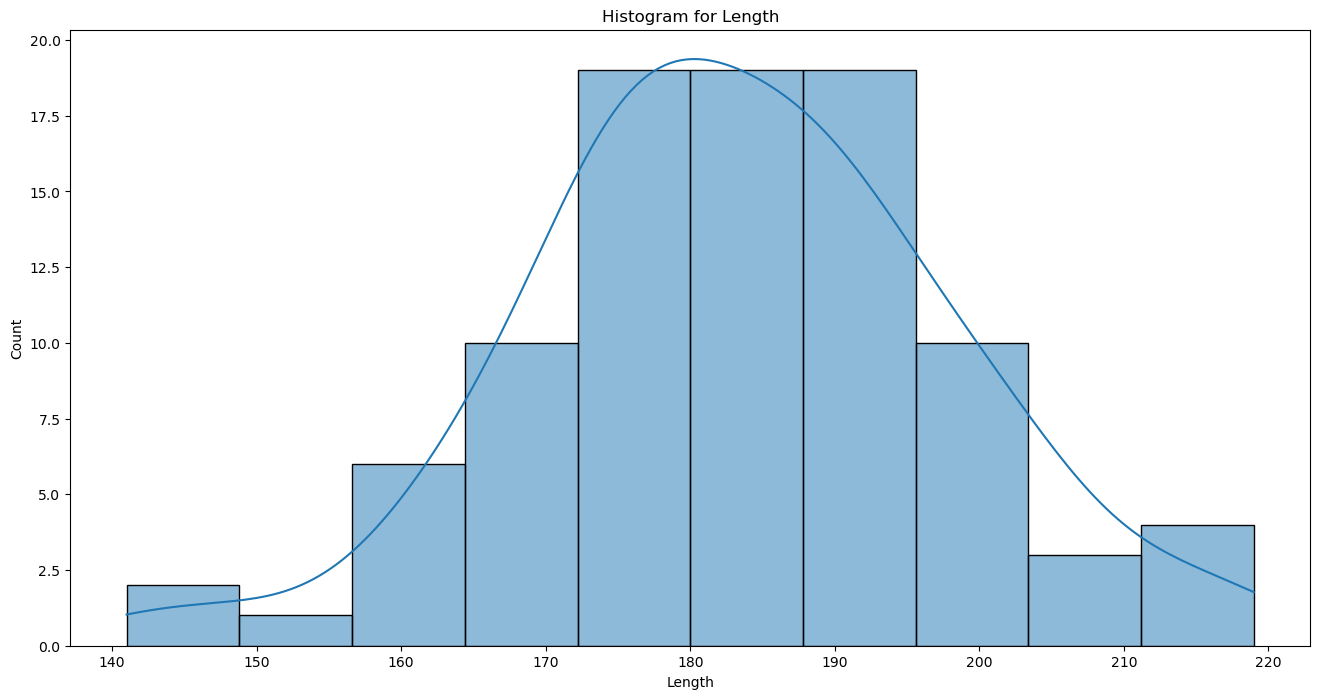

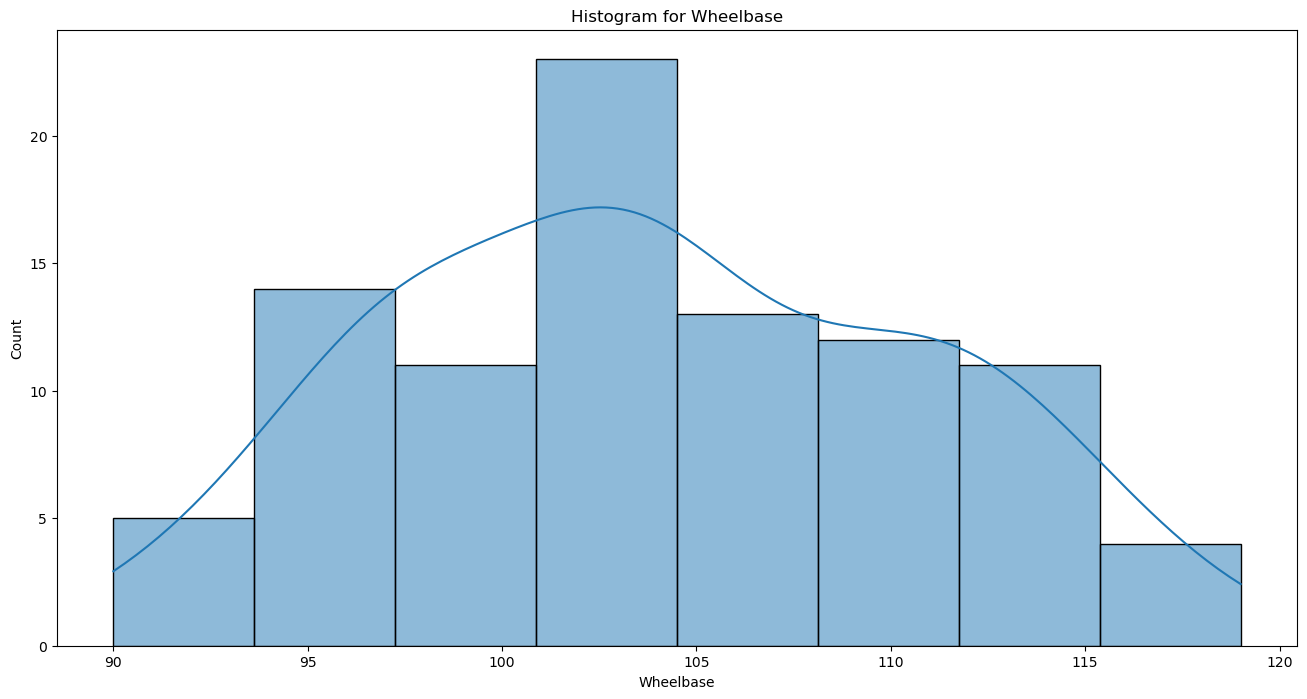

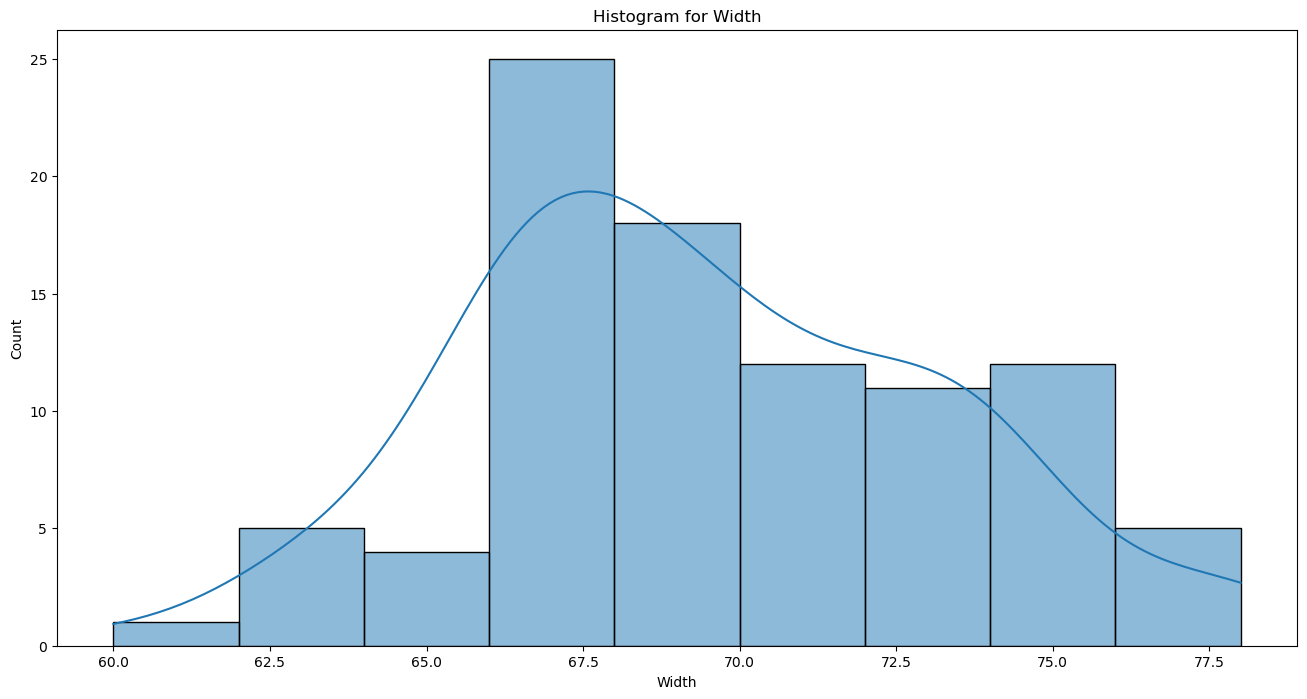

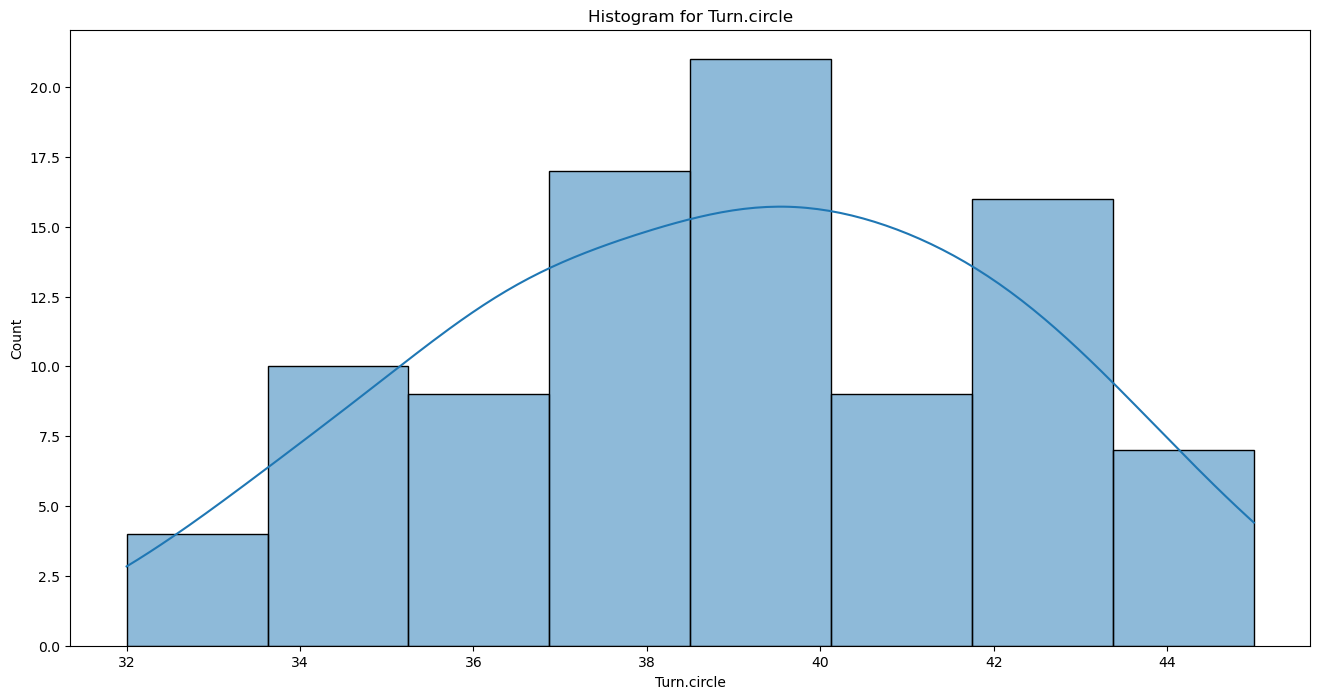

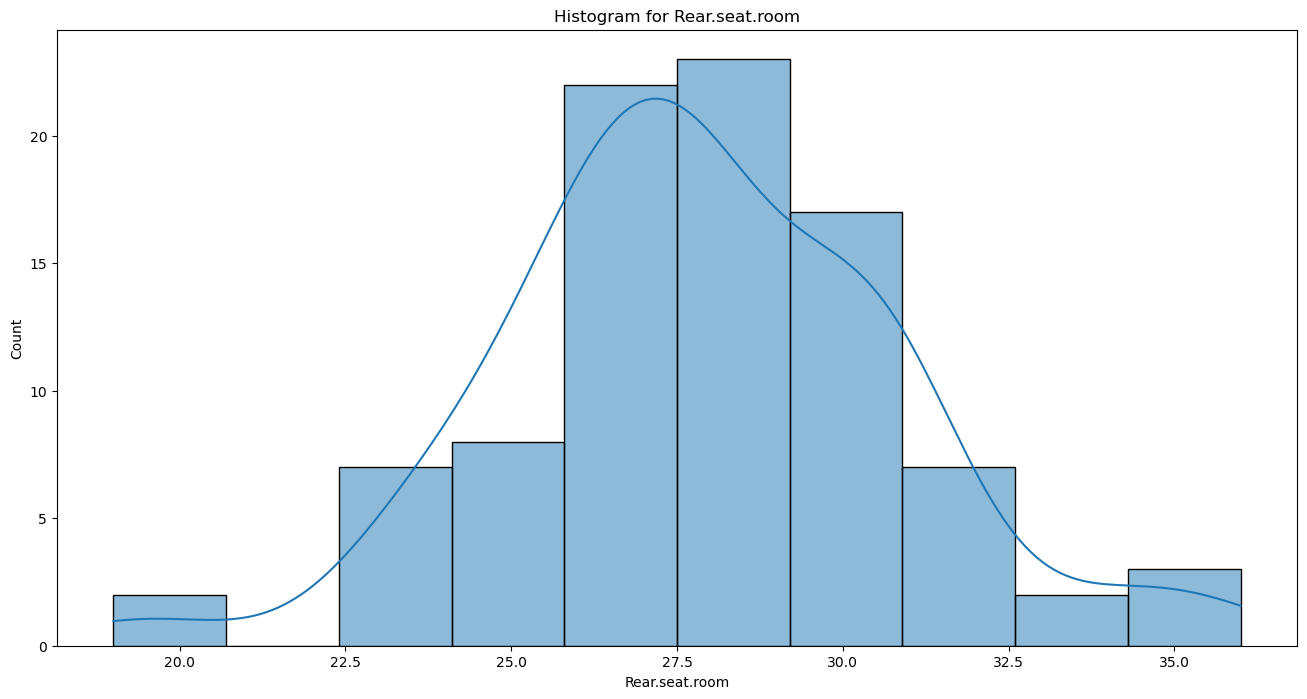

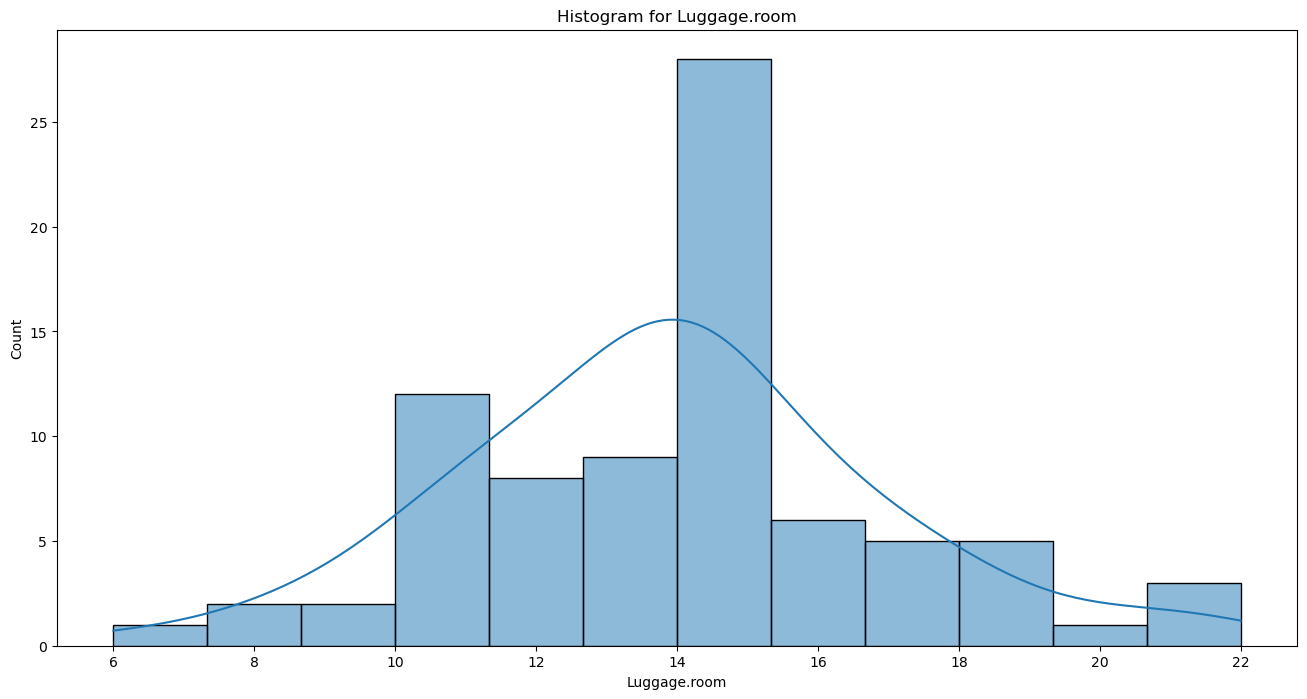

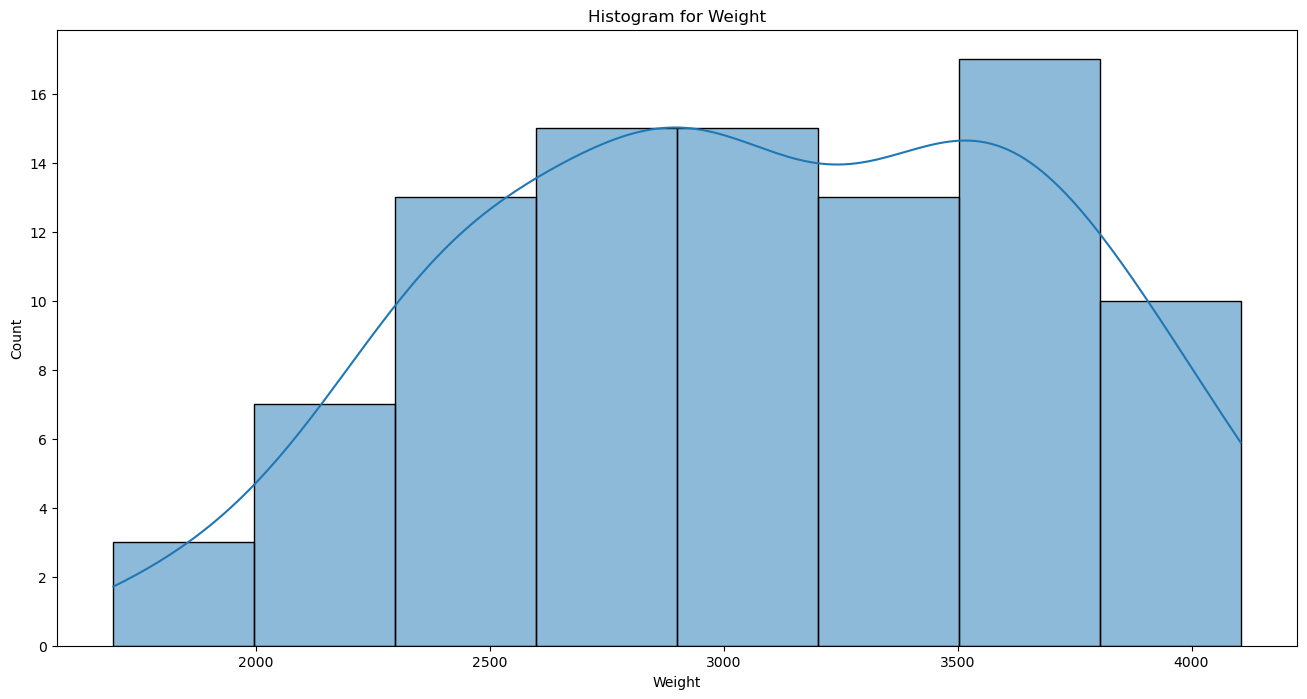

In [21]:
for i in con:
    plt.figure(figsize=(16,8))
    sns.histplot(data=df, x=i, kde=True)
    plt.title(f'Histogram for {i}')
    plt.show()

# KDE- Kernel Density Estimate
## Bivariate Analysis- Analysis of 2 variables together

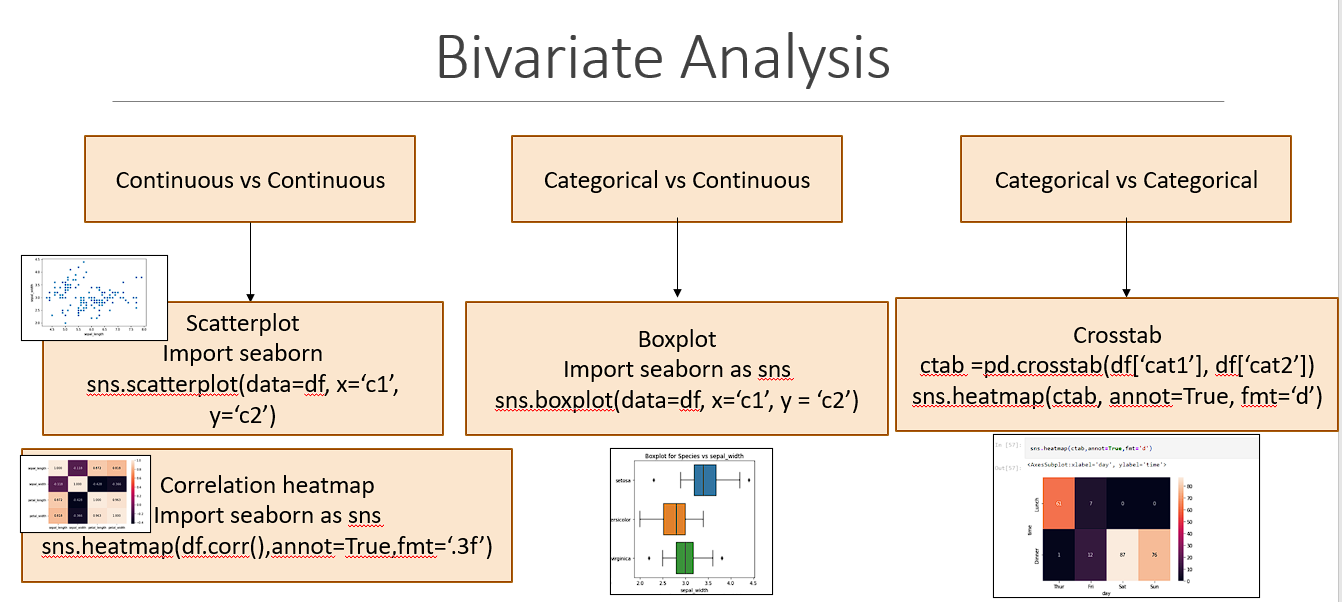

In [22]:
con

['Min.Price',
 'Price',
 'Max.Price',
 'MPG.city',
 'MPG.highway',
 'EngineSize',
 'Horsepower',
 'RPM',
 'Rev.per.mile',
 'Fuel.tank.capacity',
 'Passengers',
 'Length',
 'Wheelbase',
 'Width',
 'Turn.circle',
 'Rear.seat.room',
 'Luggage.room',
 'Weight']

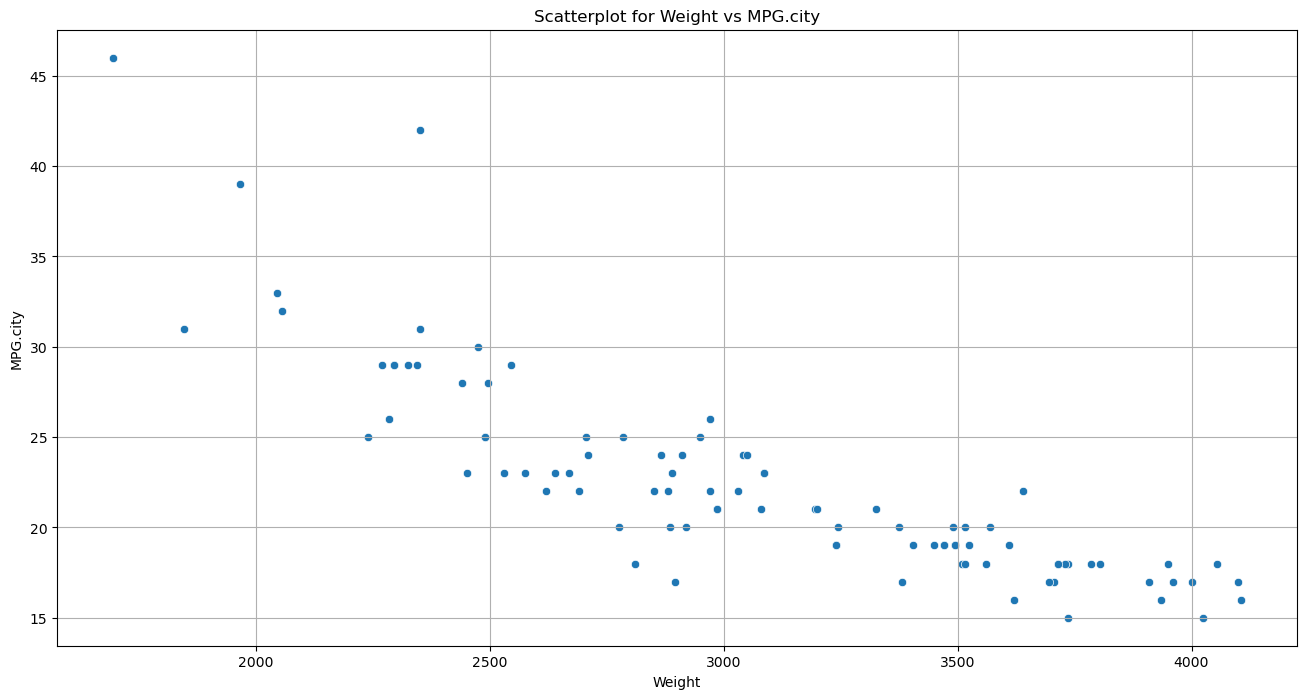

In [23]:
plt.figure(figsize=(16,8)) 
sns.scatterplot(data=df, x='Weight', y='MPG.city')
plt.title('Scatterplot for Weight vs MPG.city')
plt.grid()
plt.show()

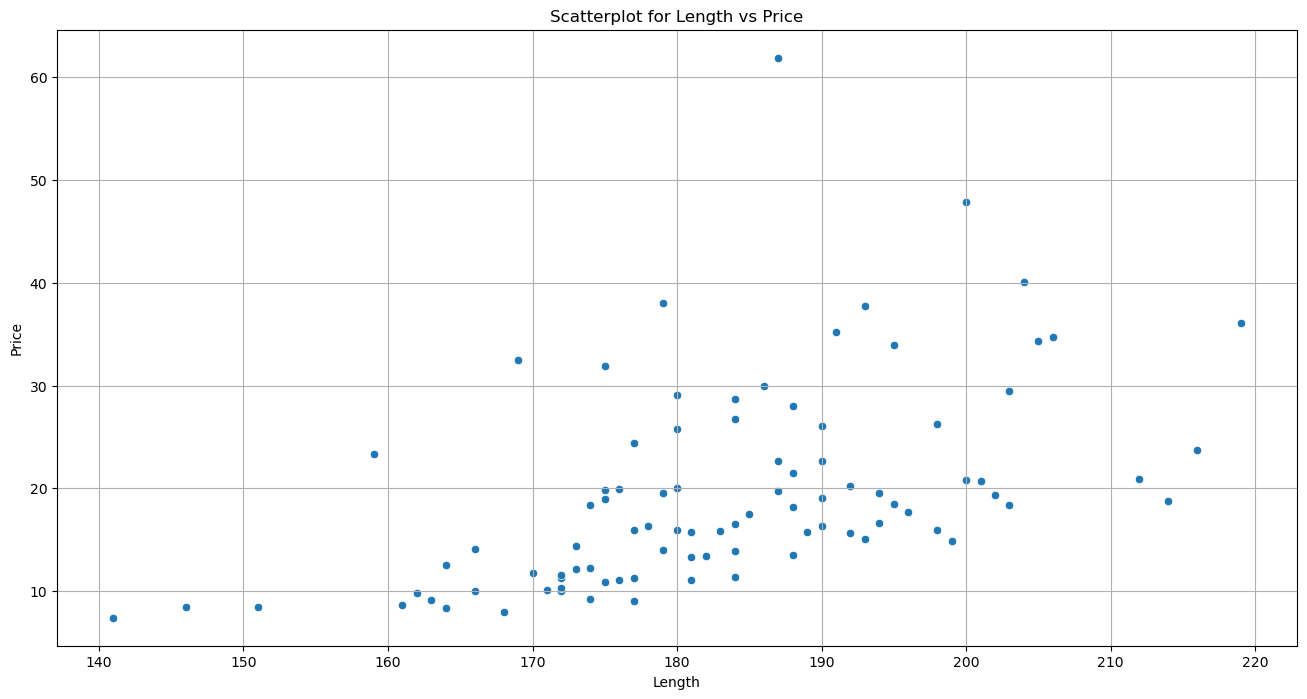

In [24]:
plt.figure(figsize=(16,8))
sns.scatterplot(data=df, x='Length', y='Price')
plt.title('Scatterplot for Length vs Price')
plt.grid()
plt.show()

# Correlation heatmap

In [25]:
df[con].corr()

Min.Price     Price  Max.Price  MPG.city  MPG.highway  \
Min.Price            1.000000  0.970601   0.906756 -0.622875    -0.579966   
Price                0.970601  1.000000   0.981580 -0.594562    -0.560680   
Max.Price            0.906756  0.981580   1.000000 -0.547811    -0.522561   
MPG.city            -0.622875 -0.594562  -0.547811  1.000000     0.943936   
MPG.highway         -0.579966 -0.560680  -0.522561  0.943936     1.000000   
EngineSize           0.645488  0.597425   0.535012 -0.710003    -0.626795   
Horsepower           0.802444  0.788218   0.744445 -0.672636    -0.619044   
RPM                 -0.042598 -0.004955   0.025015  0.363045     0.313469   
Rev.per.mile        -0.470395 -0.426395  -0.374024  0.695857     0.587497   
Fuel.tank.capacity   0.635369  0.619480   0.581294 -0.813144    -0.786039   
Passengers           0.061236  0.057860   0.053216 -0.416856    -0.466386   
Length               0.553859  0.503628   0.442933 -0.666239    -0.542897   
Wheelbase            0.516758  0.500864   0.467501 -0.667108    -0.615384   
Width                0.492878  0.456028   0.408414 -0.720534    -0.640359   
Turn.circle          0.428603  0.392590   0.347785 -0.666389    -0.593683   
Rear.seat.room       0.376642  0.311499   0.247260 -0.384347    -0.366684   
Luggage.room         0.413485  0.366569   0.315315 -0.494894    -0.371629   
Weight               0.666554  0.647179   0.605142 -0.843139    -0.810658   

                    EngineSize  Horsepower       RPM  Rev.per.mile  \
Min.Price             0.645488    0.802444 -0.042598     -0.470395   
Price                 0.597425    0.788218 -0.004955     -0.426395   
Max.Price             0.535012    0.744445  0.025015     -0.374024   
MPG.city             -0.710003   -0.672636  0.363045      0.695857   
MPG.highway          -0.626795   -0.619044  0.313469      0.587497   
EngineSize            1.000000    0.732120 -0.547898     -0.824009   
Horsepower            0.732120    1.000000  0.036688     -0.600314   
RPM                  -0.547898    0.036688  1.000000      0.494764   
Rev.per.mile         -0.824009   -0.600314  0.494764      1.000000   
Fuel.tank.capacity    0.759306    0.711790 -0.333345     -0.609710   
Passengers            0.372721    0.009264 -0.467138     -0.334976   
Length                0.780283    0.550865 -0.441249     -0.690233   
Wheelbase             0.732484    0.486854 -0.467812     -0.636824   
Width                 0.867110    0.644413 -0.539721     -0.780460   
Turn.circle           0.778464    0.561216 -0.505651     -0.733160   
Rear.seat.room        0.502750    0.256732 -0.342175     -0.377010   
Luggage.room          0.680827    0.359217 -0.524845     -0.592792   
Weight                0.845075    0.738798 -0.427931     -0.735264   

                    Fuel.tank.capacity  Passengers    Length  Wheelbase  \
Min.Price                     0.635369    0.061236  0.553859   0.516758   
Price                         0.619480    0.057860  0.503628   0.500864   
Max.Price                     0.581294    0.053216  0.442933   0.467501   
MPG.city                     -0.813144   -0.416856 -0.666239  -0.667108   
MPG.highway                  -0.786039   -0.466386 -0.542897  -0.615384   
EngineSize                    0.759306    0.372721  0.780283   0.732484   
Horsepower                    0.711790    0.009264  0.550865   0.486854   
RPM                          -0.333345   -0.467138 -0.441249  -0.467812   
Rev.per.mile                 -0.609710   -0.334976 -0.690233  -0.636824   
Fuel.tank.capacity            1.000000    0.472095  0.690461   0.757674   
Passengers                    0.472095    1.000000  0.485294   0.694054   
Length                        0.690461    0.485294  1.000000   0.823650   
Wheelbase                     0.757674    0.694054  0.823650   1.000000   
Width                         0.798719    0.489979  0.822148   0.807213   
Turn.circle                   0.671343    0.449025  0.738955   0.723324   
Rear.seat.room           

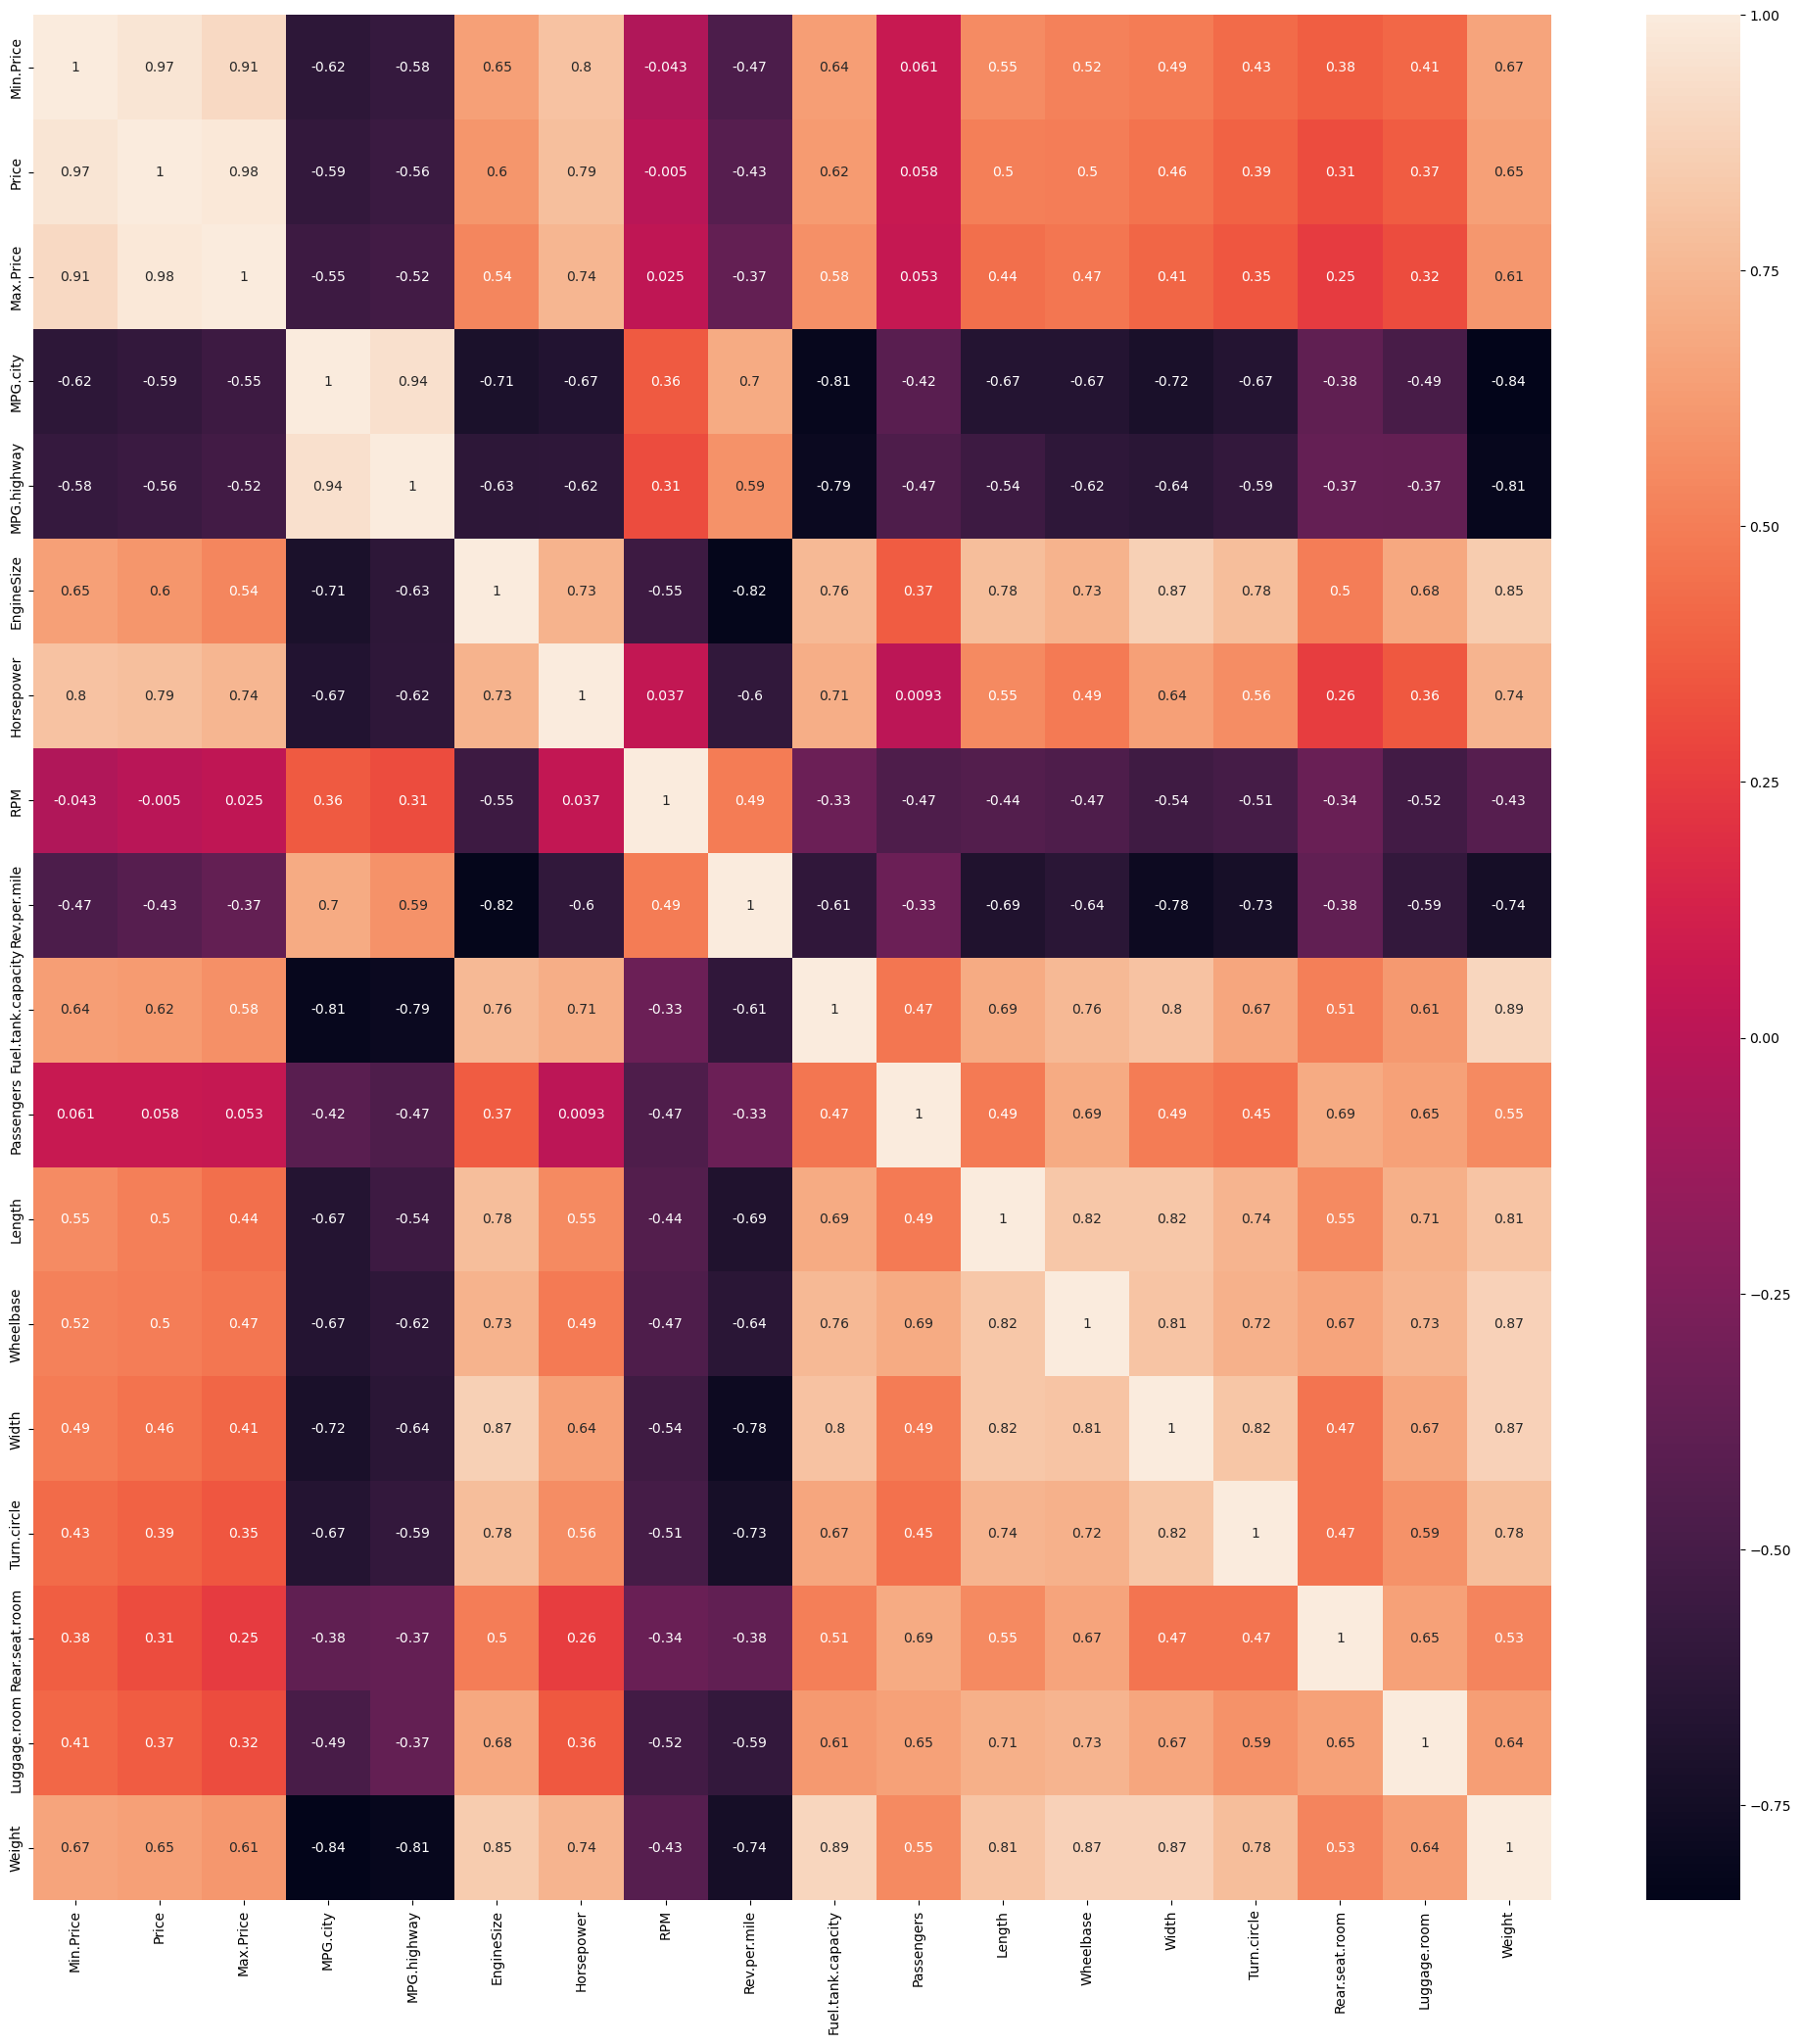

In [26]:
plt.figure(figsize=(25,25))
sns.heatmap(df[con].corr(), annot=True)
plt.show()

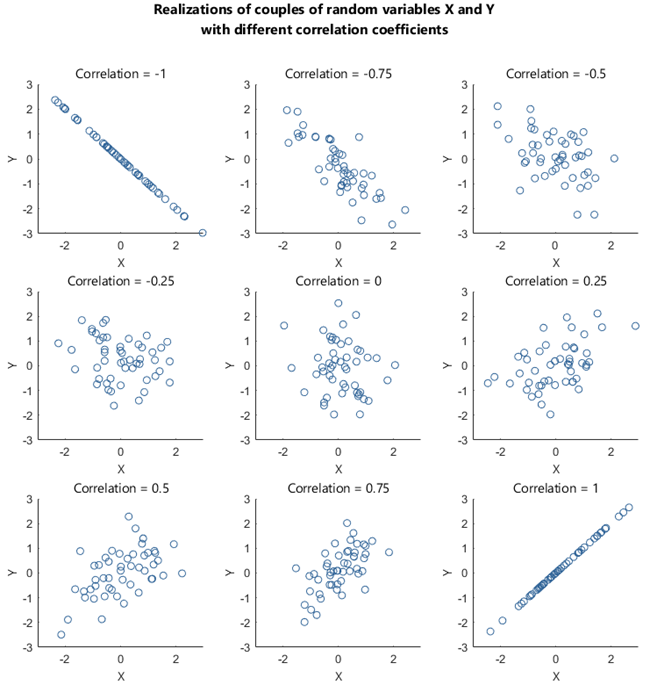

# Boxplot - Categorical vs Continuous

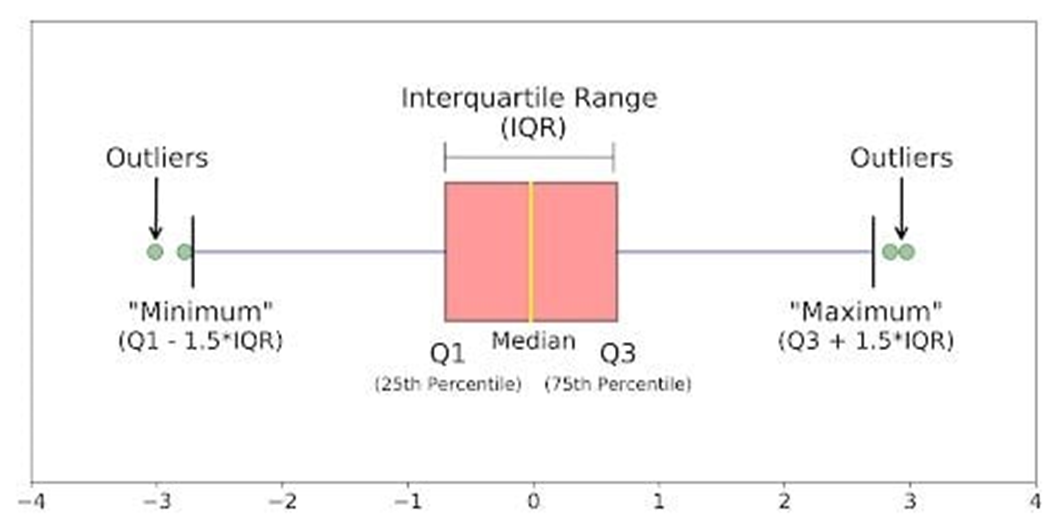

In [27]:
cat

['Manufacturer',
 'Model',
 'Type',
 'AirBags',
 'DriveTrain',
 'Cylinders',
 'Man.trans.avail',
 'Origin',
 'Make']

In [28]:
con

['Min.Price',
 'Price',
 'Max.Price',
 'MPG.city',
 'MPG.highway',
 'EngineSize',
 'Horsepower',
 'RPM',
 'Rev.per.mile',
 'Fuel.tank.capacity',
 'Passengers',
 'Length',
 'Wheelbase',
 'Width',
 'Turn.circle',
 'Rear.seat.room',
 'Luggage.room',
 'Weight']

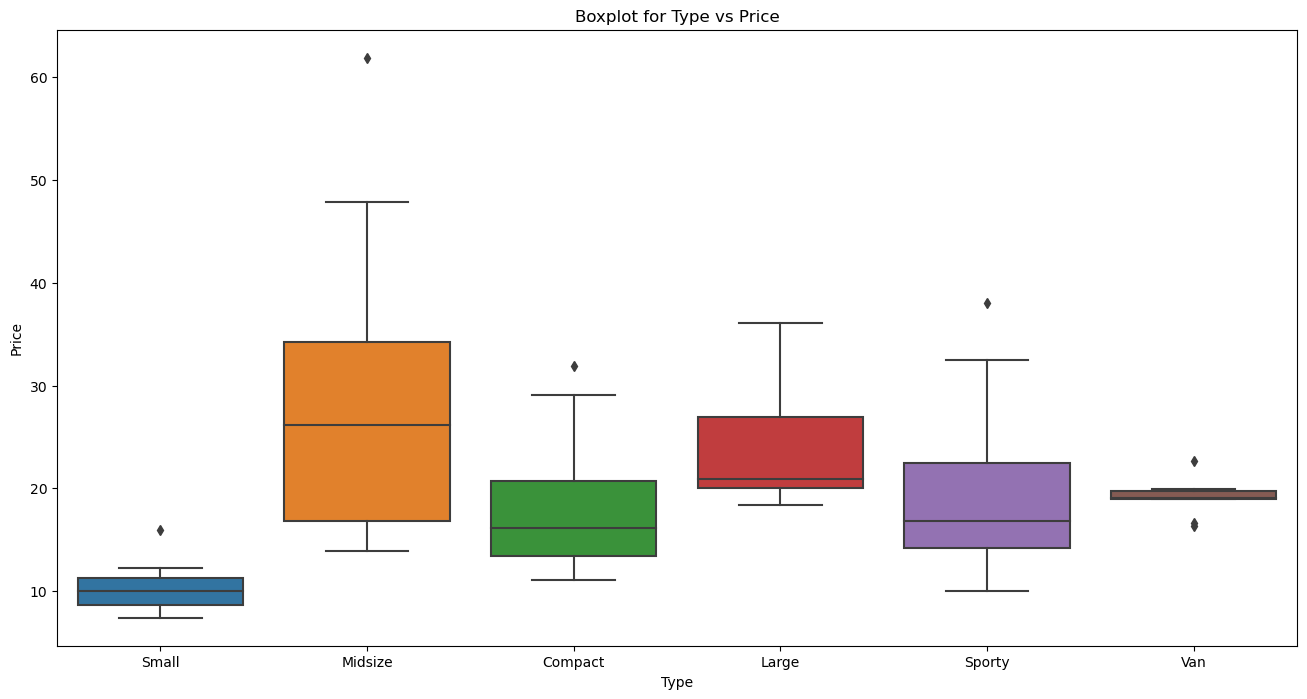

In [29]:
plt.figure(figsize=(16,8))
sns.boxplot(data=df, x='Type', y='Price')
plt.title('Boxplot for Type vs Price')
plt.show()

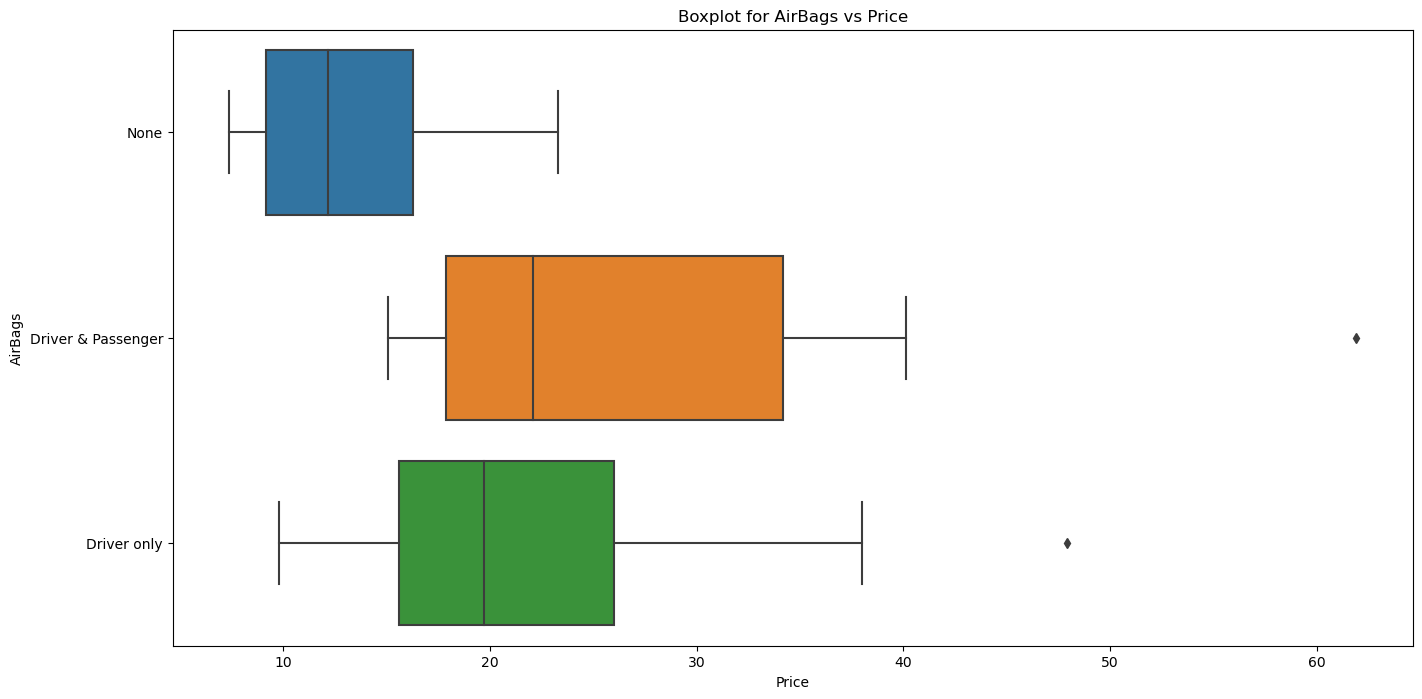

In [31]:
plt.figure(figsize=(16,8))
sns.boxplot(data=df, x='Price', y='AirBags')
plt.title('Boxplot for AirBags vs Price')
plt.show()

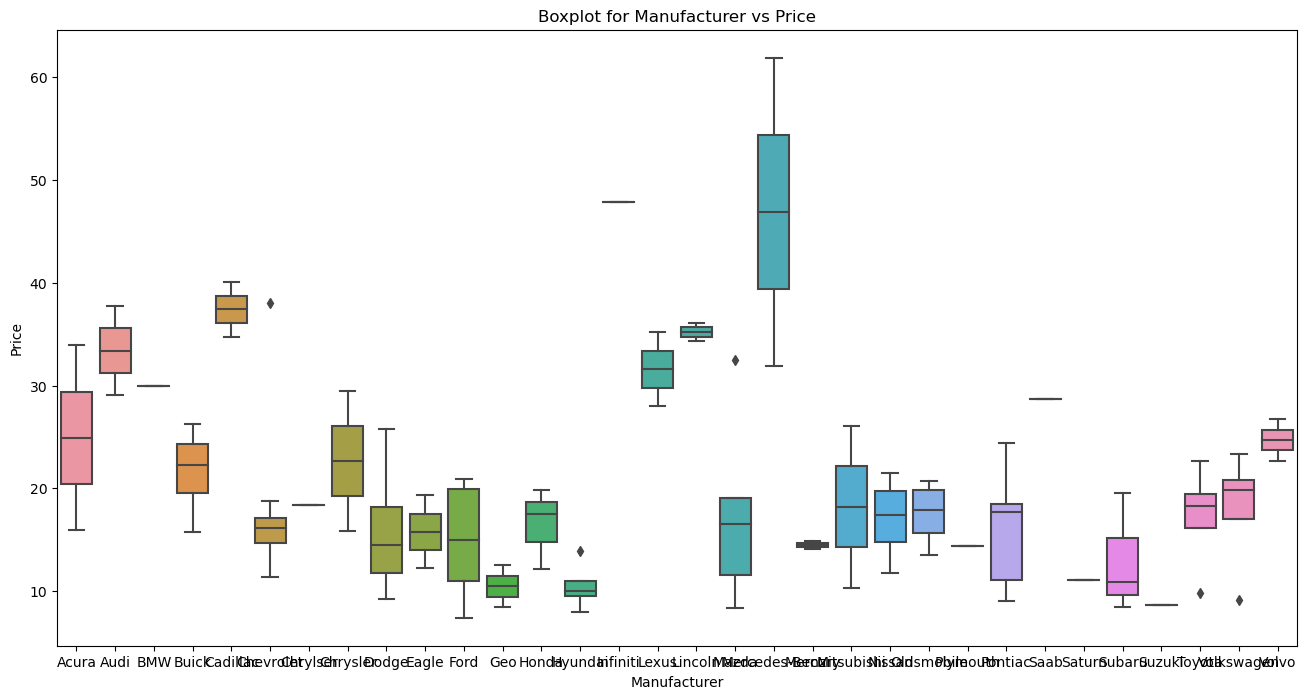

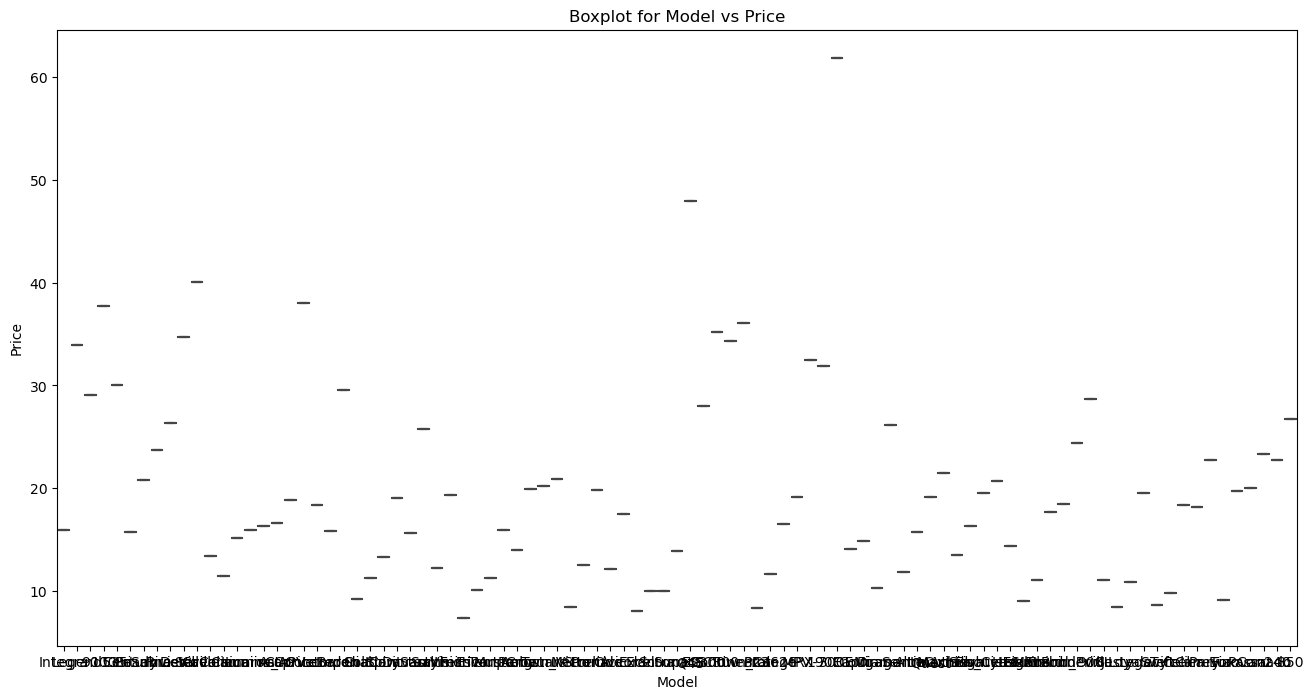

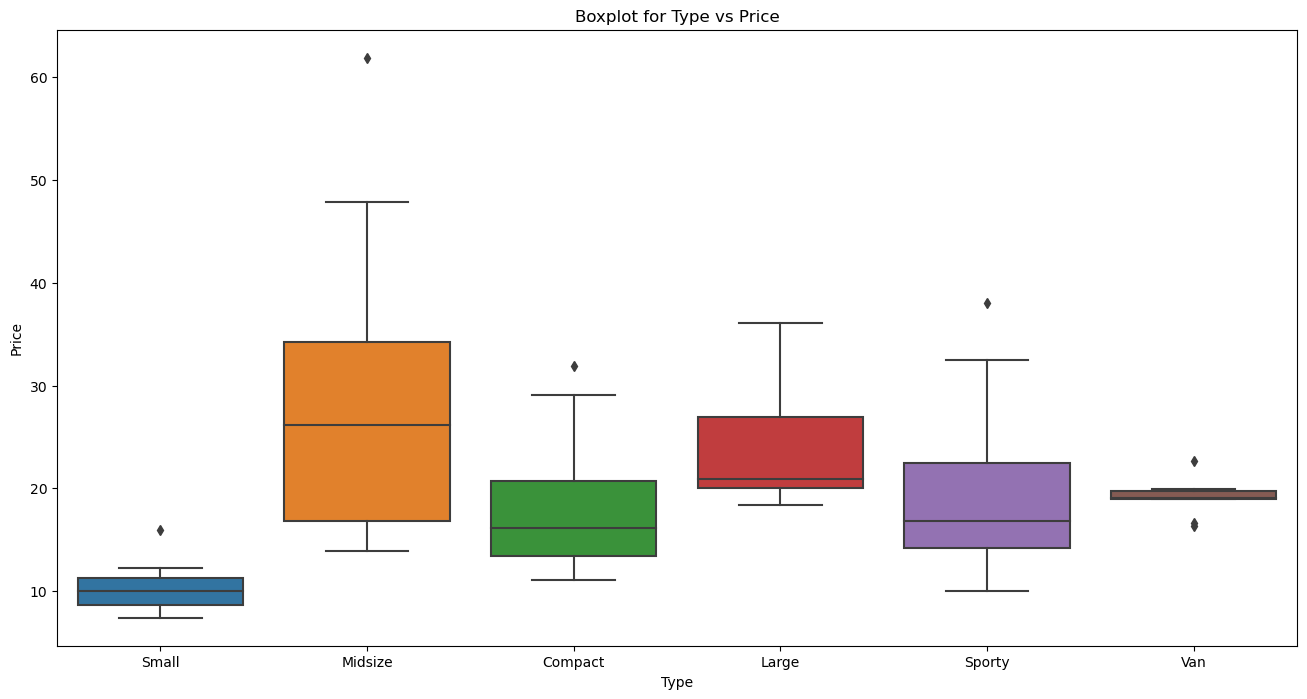

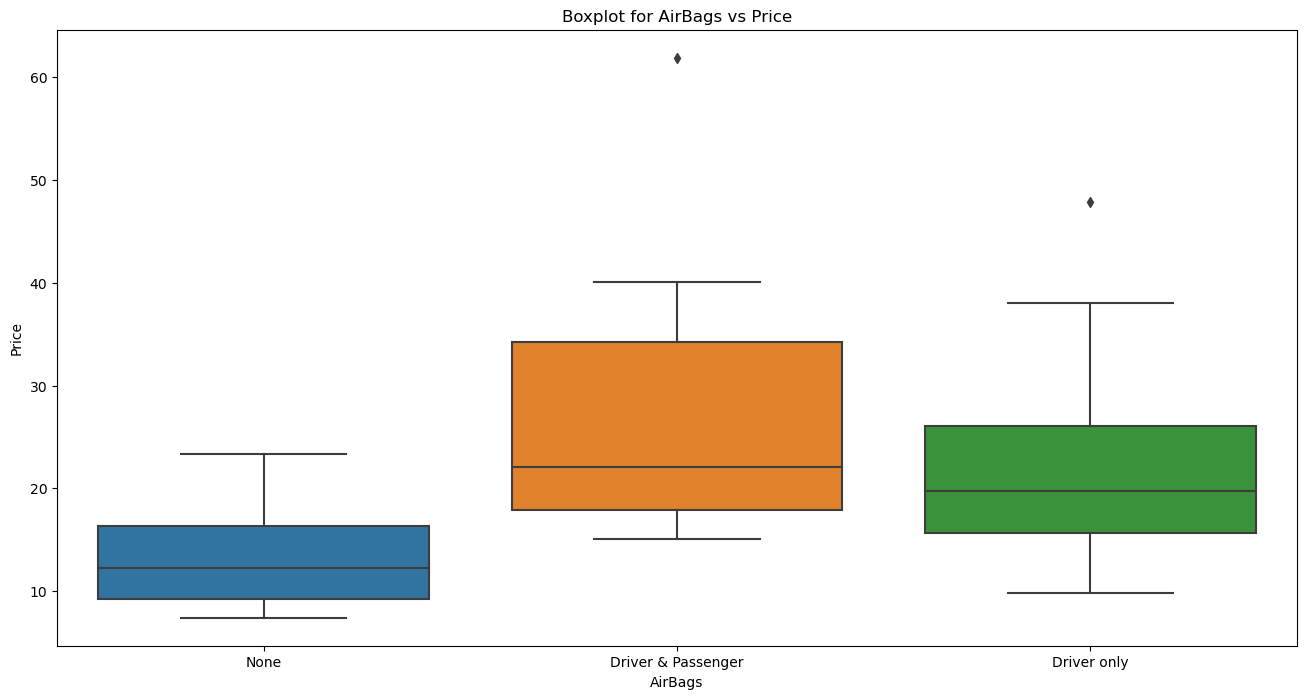

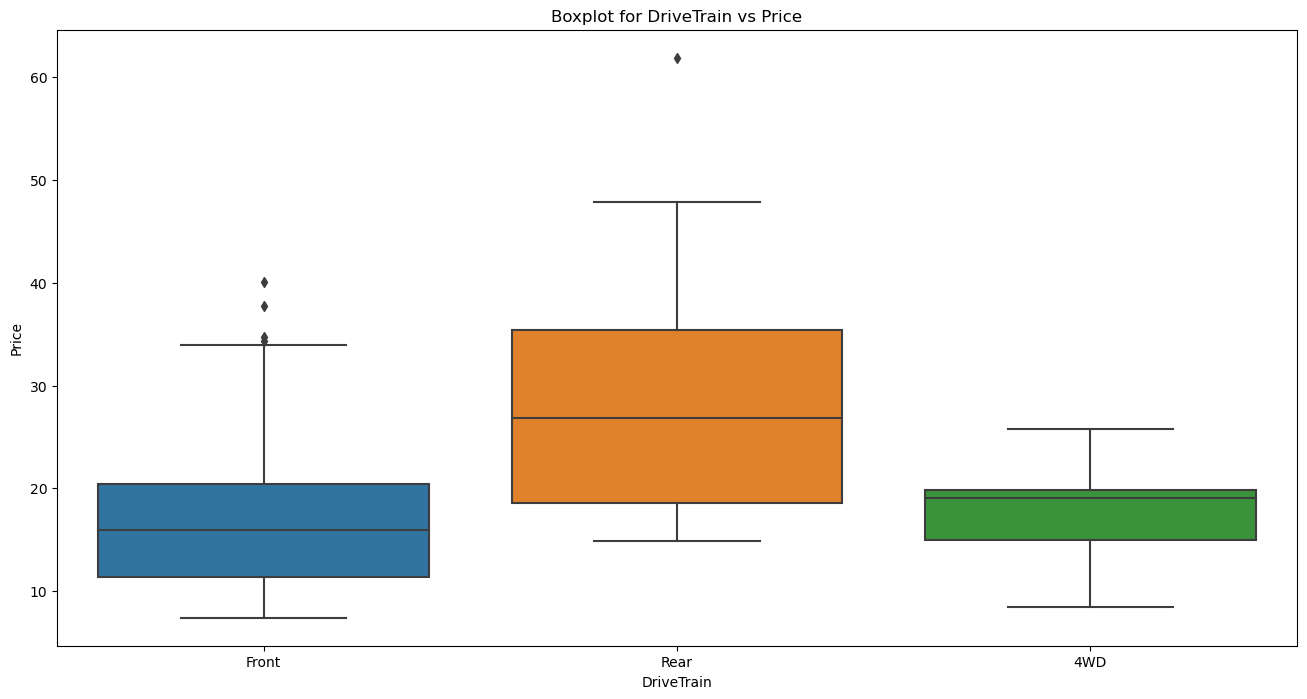

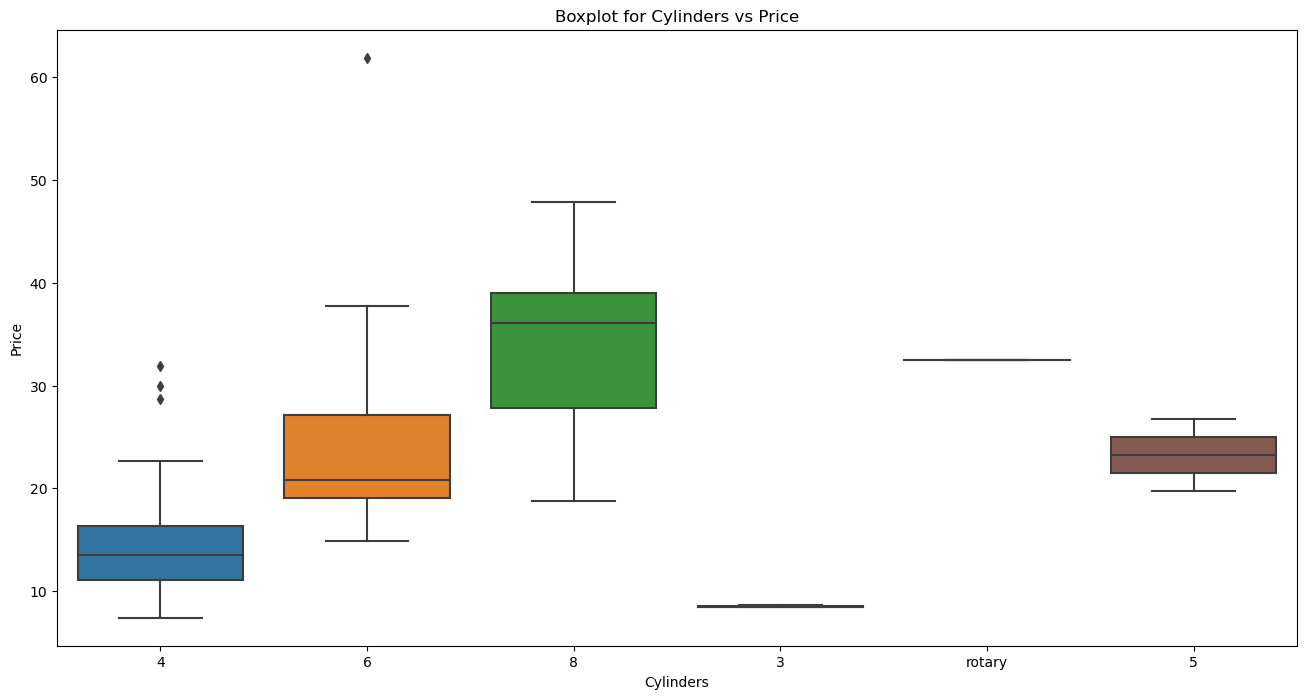

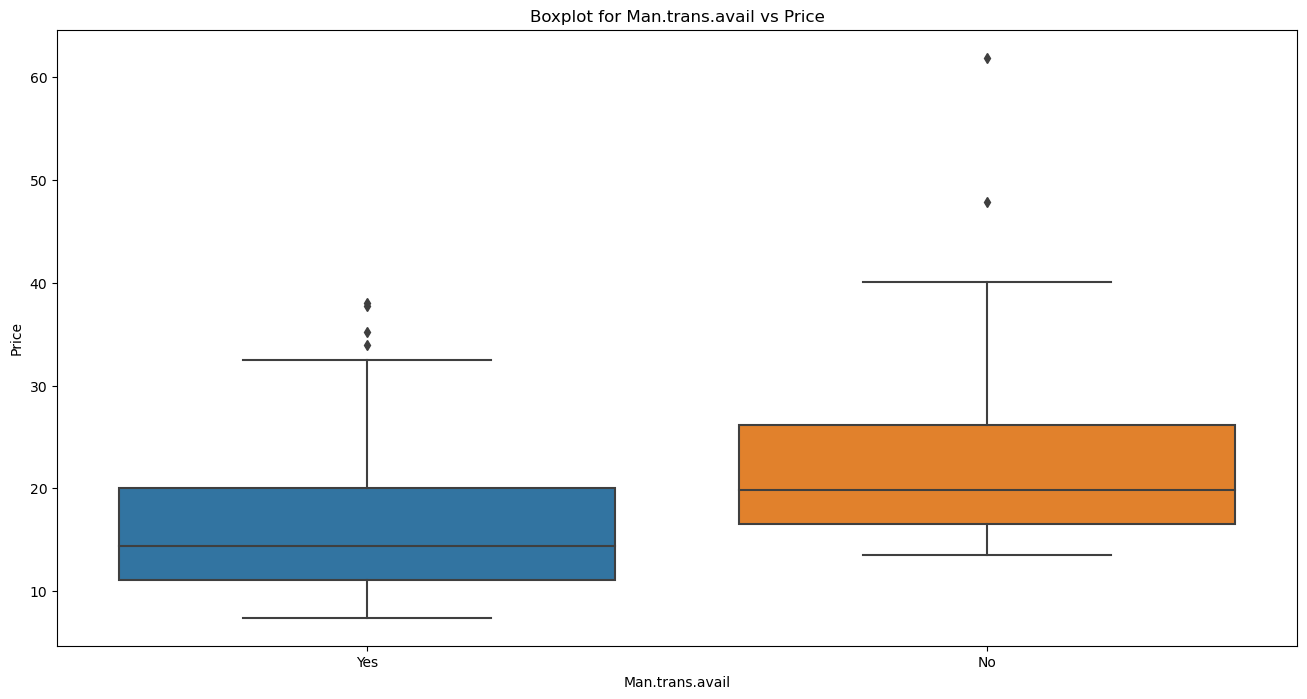

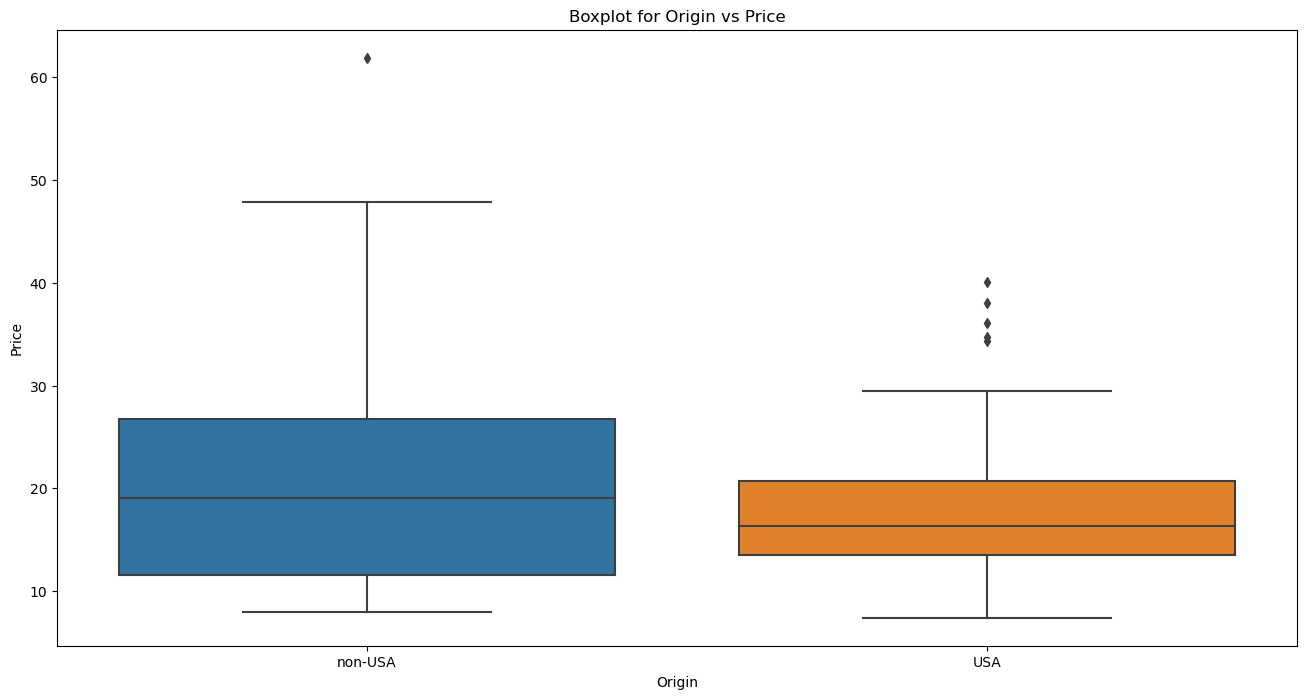

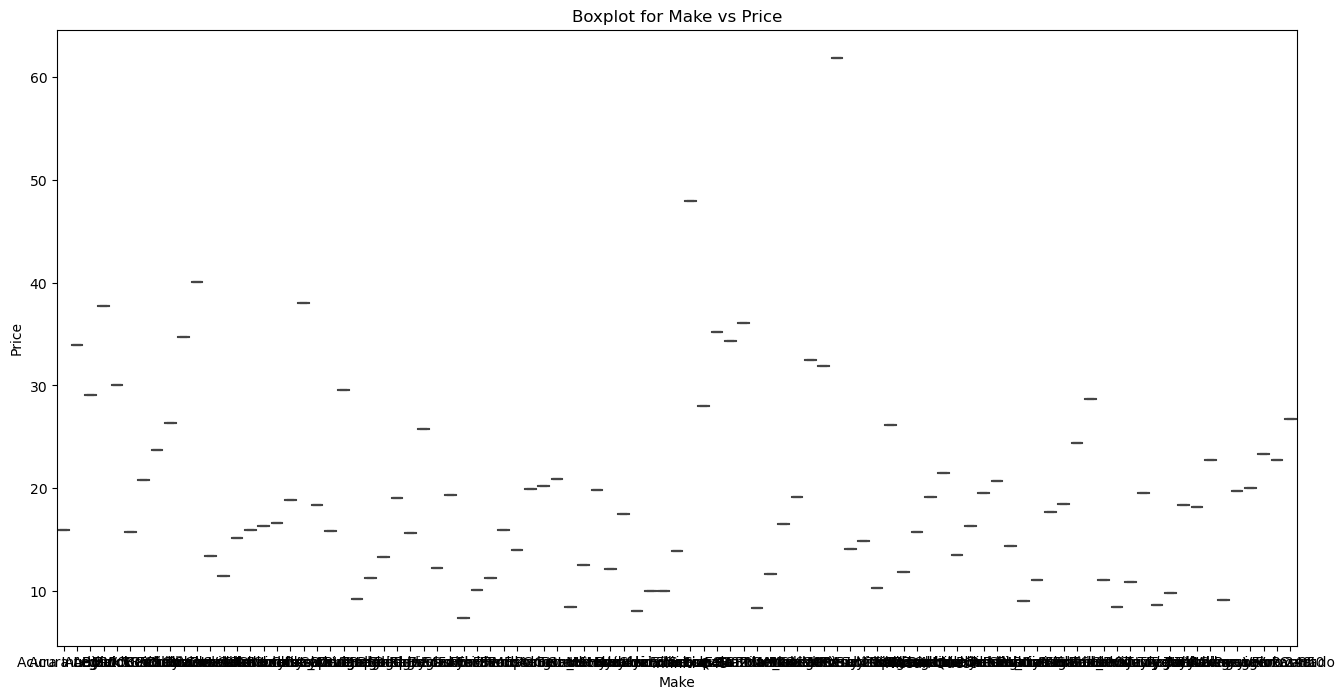

In [34]:
for i in cat:
    plt.figure(figsize=(16,8))
    sns.boxplot(data=df, x=i, y='Price')
    plt.title(f'Boxplot for {i} vs Price')
    plt.show()

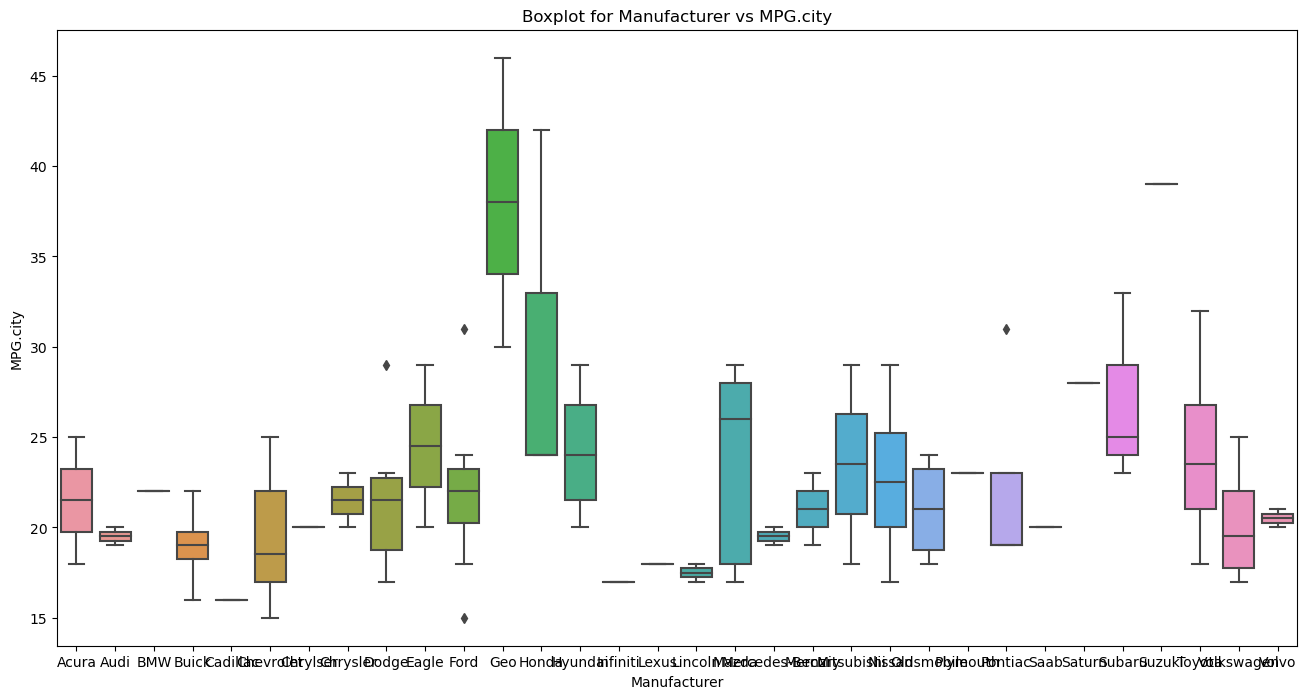

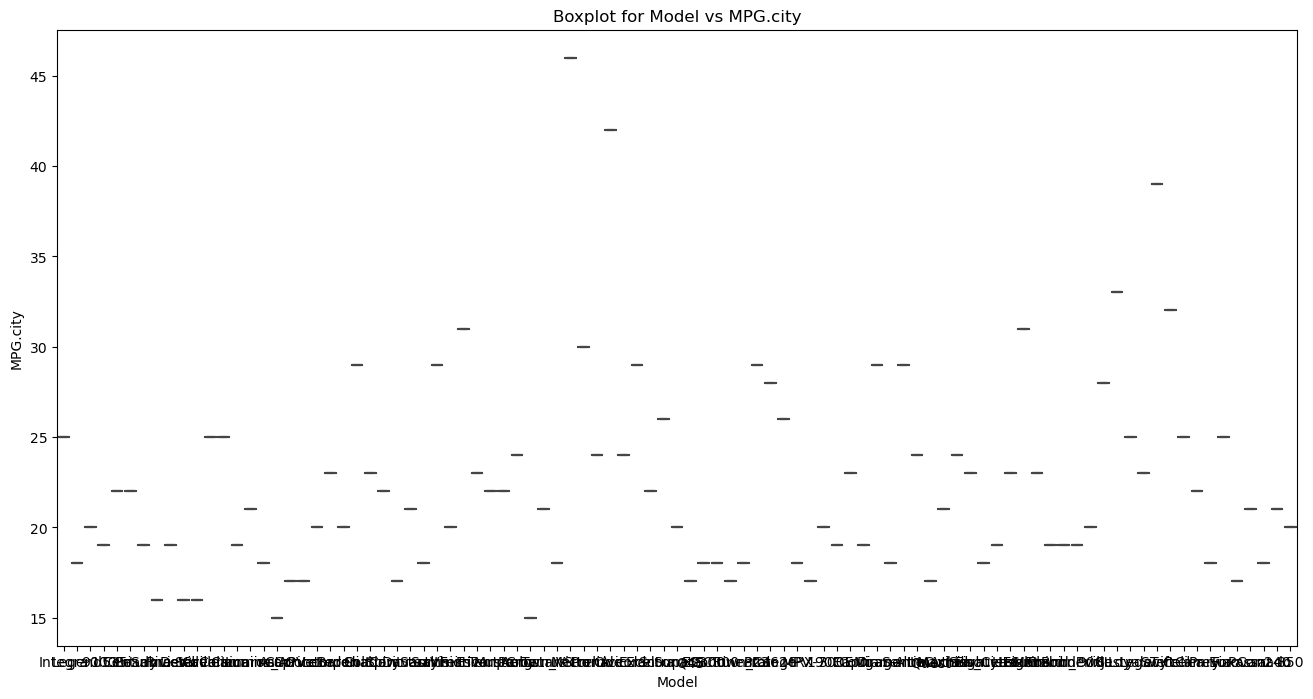

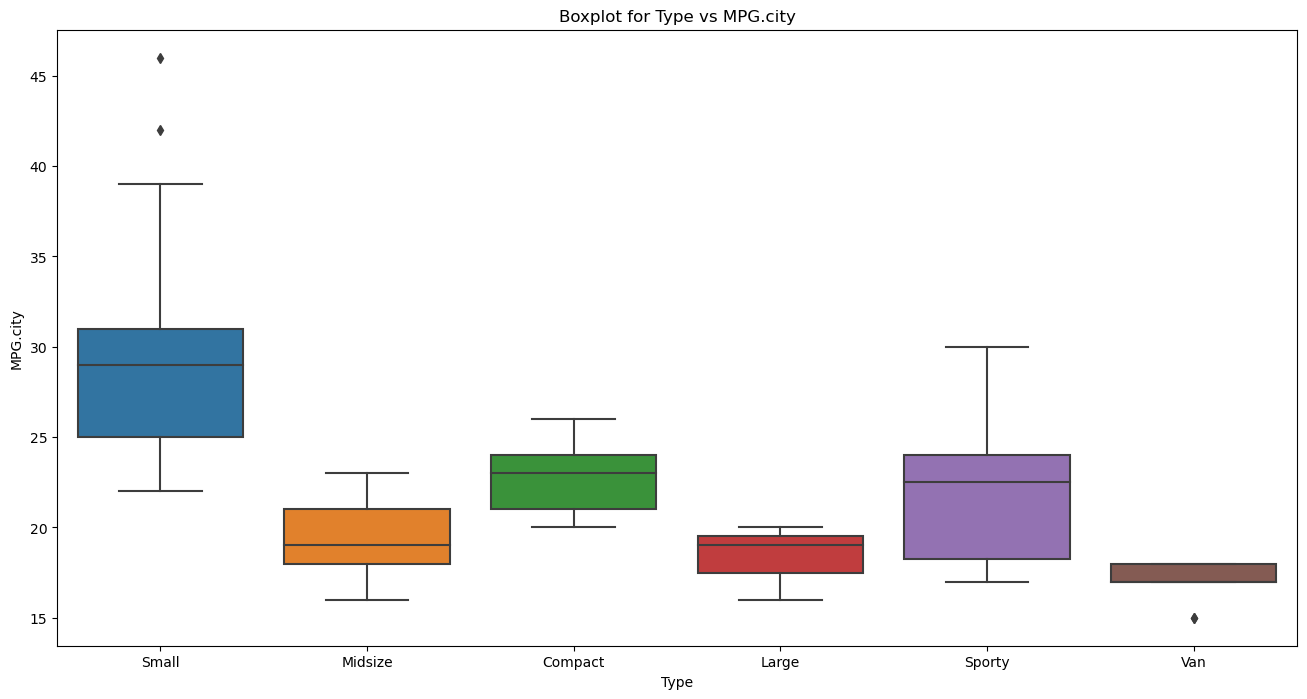

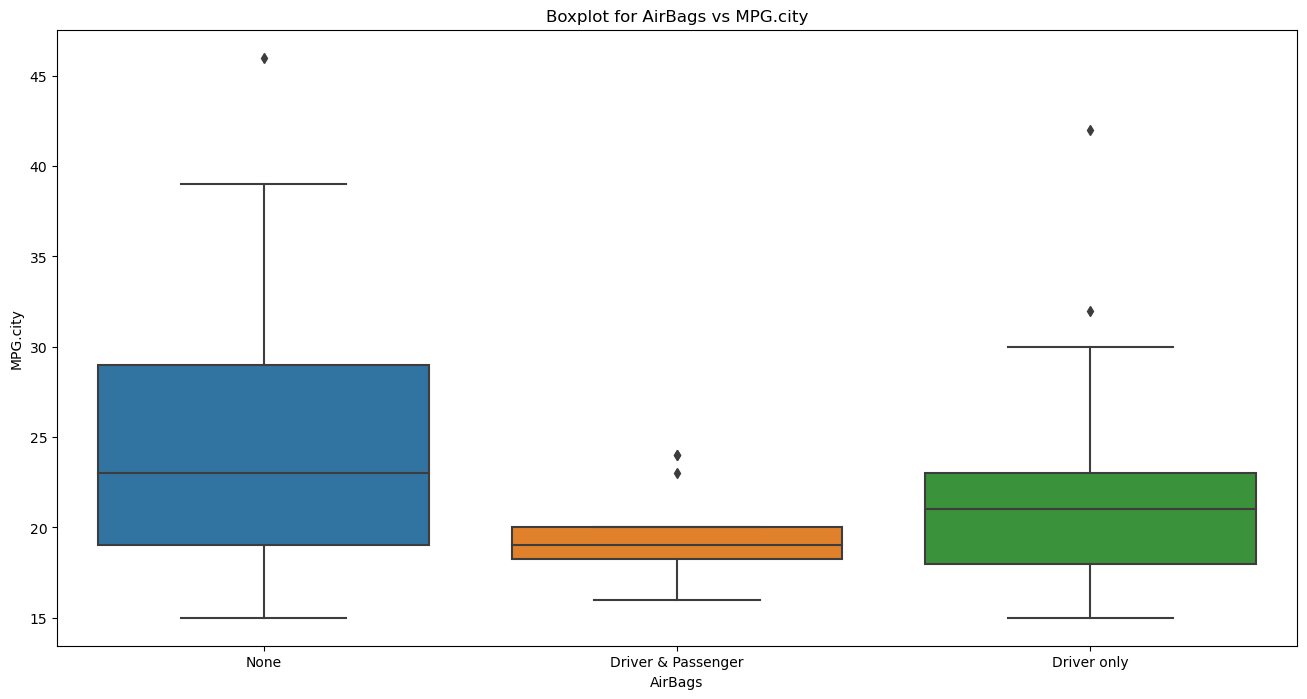

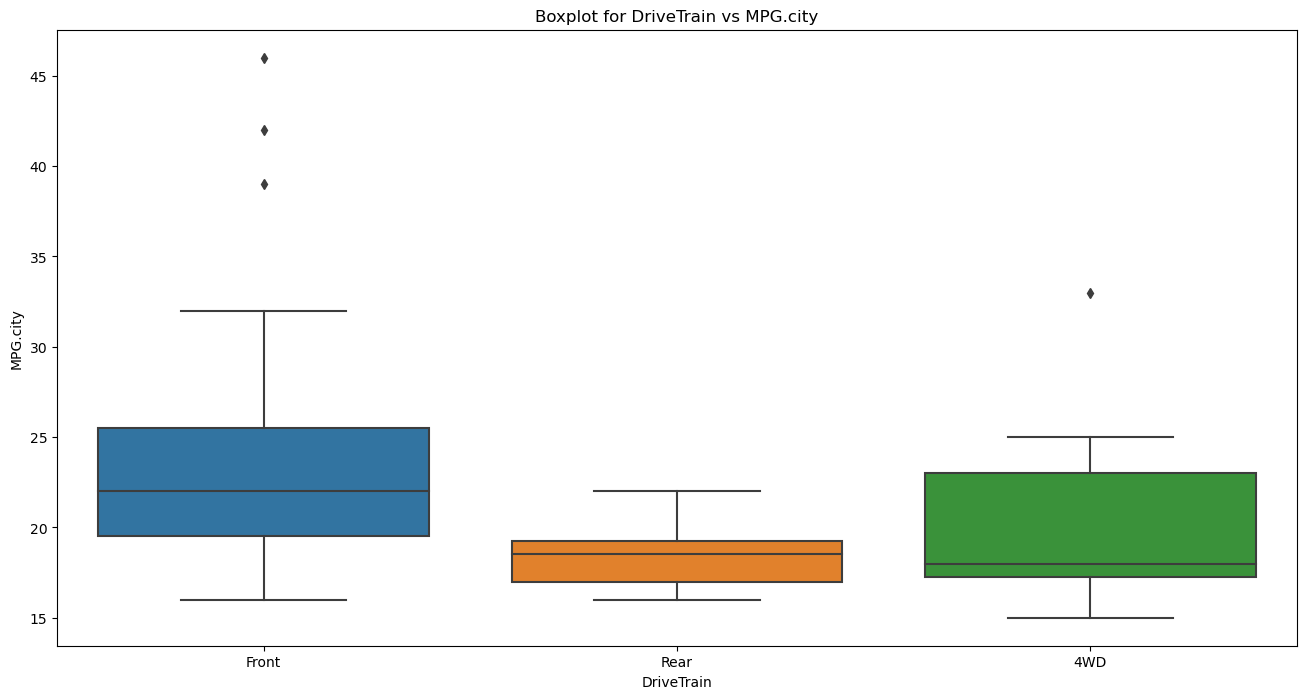

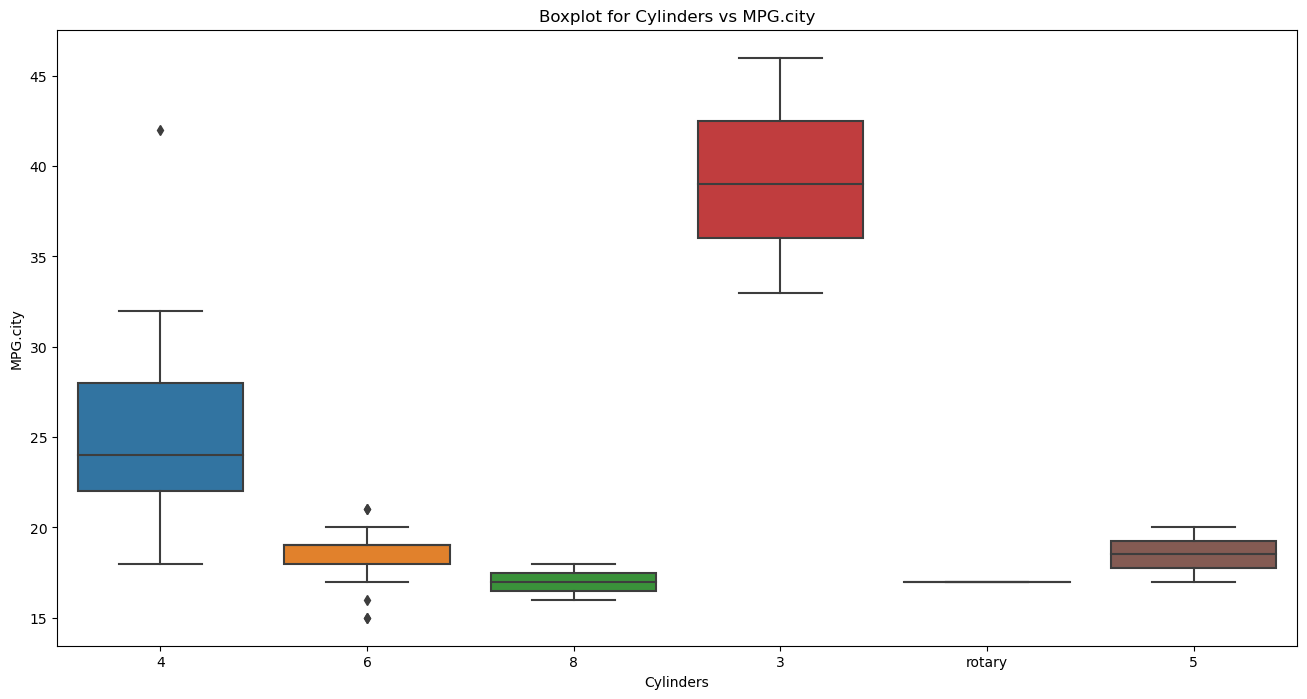

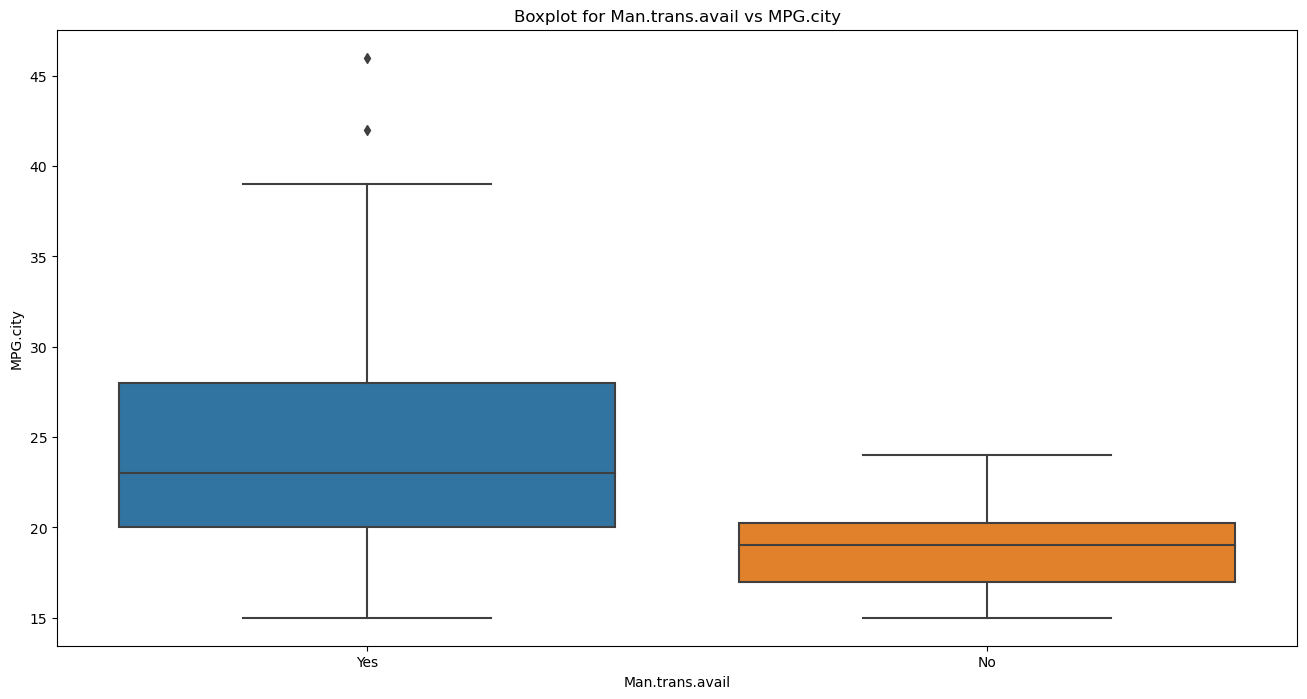

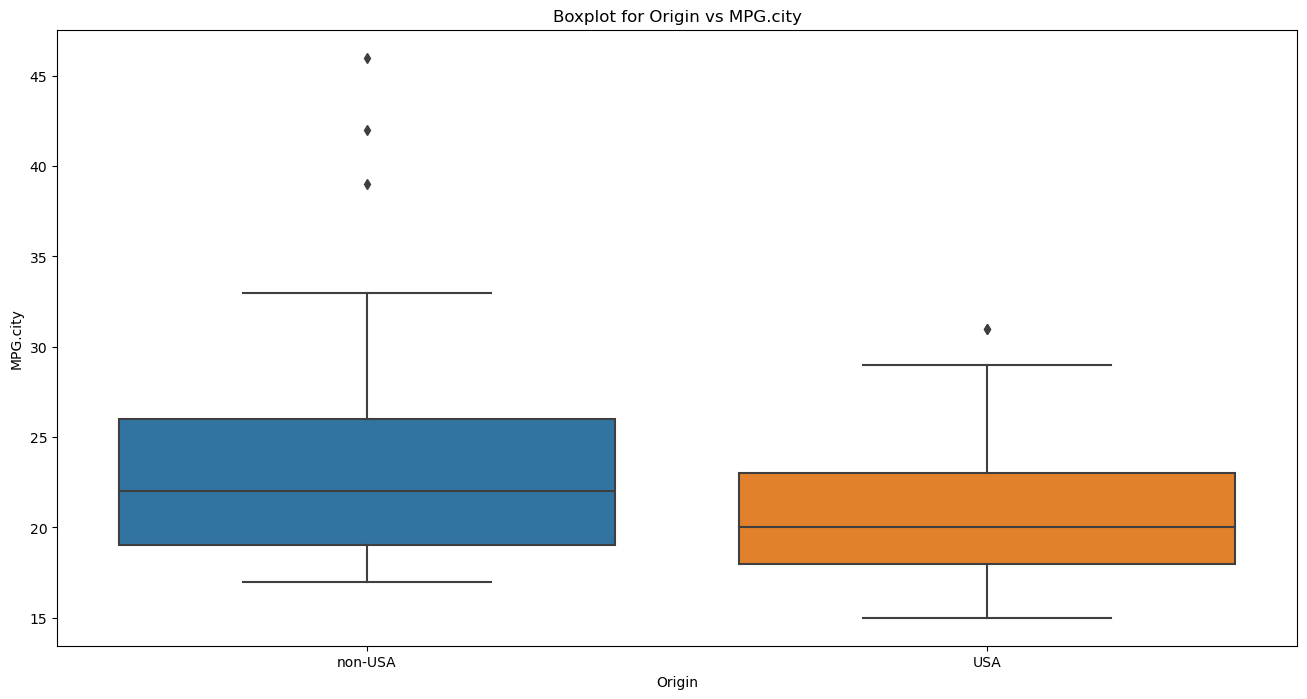

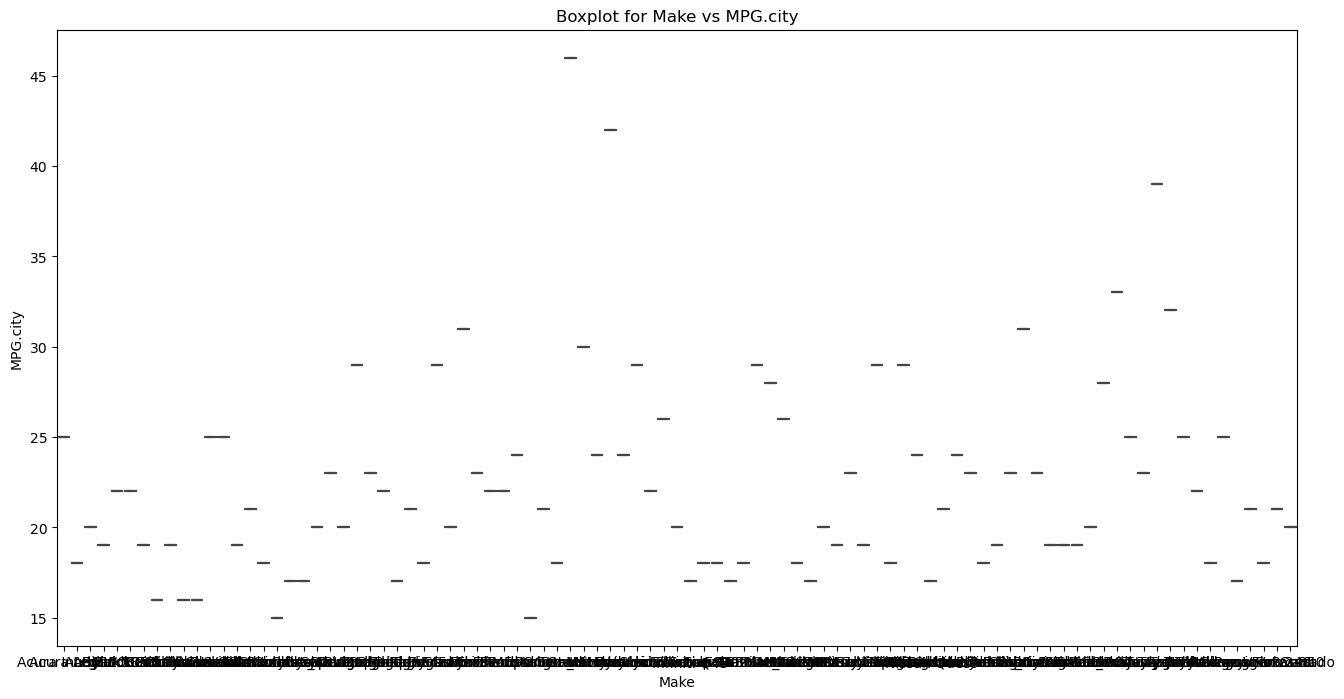

In [35]:
for i in cat:
    plt.figure(figsize=(16,8))
    sns.boxplot(data=df, x=i, y='MPG.city')
    plt.title(f'Boxplot for {i} vs MPG.city')
    plt.show()

## Categorical vs Cateogorical

In [36]:
cat

['Manufacturer',
 'Model',
 'Type',
 'AirBags',
 'DriveTrain',
 'Cylinders',
 'Man.trans.avail',
 'Origin',
 'Make']

In [37]:
ctab1 = pd.crosstab(df['Type'], df['Cylinders'])
ctab1

Cylinders  3   4  5   6  8  rotary
Type                              
Compact    0  15  0   1  0       0
Large      0   0  0   7  4       0
Midsize    0   7  1  12  2       0
Small      3  18  0   0  0       0
Sporty     0   8  0   4  1       1
Van        0   1  1   7  0       0

<Axes: xlabel='Cylinders', ylabel='Type'>

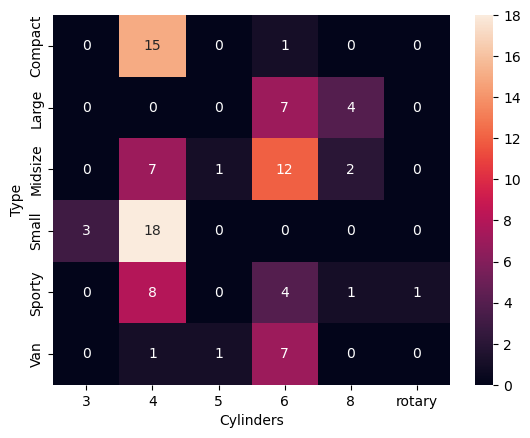

In [38]:
sns.heatmap(ctab1, annot=True)

In [39]:
ctab2 = pd.crosstab(df['Man.trans.avail'], df['DriveTrain'])
ctab2

DriveTrain       4WD  Front  Rear
Man.trans.avail                  
No                 3     22     7
Yes                7     45     9

<Axes: xlabel='DriveTrain', ylabel='Man.trans.avail'>

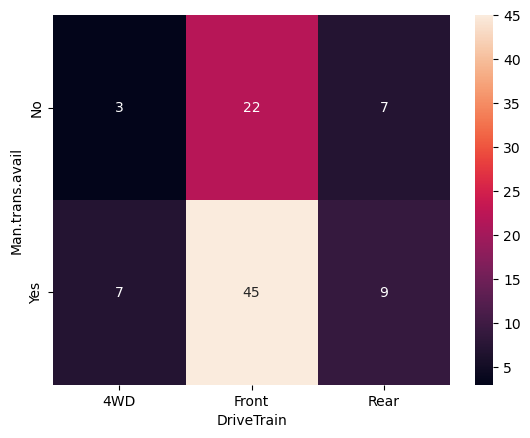

In [40]:
sns.heatmap(ctab2, annot=True)

#3 Multivariate pairplot

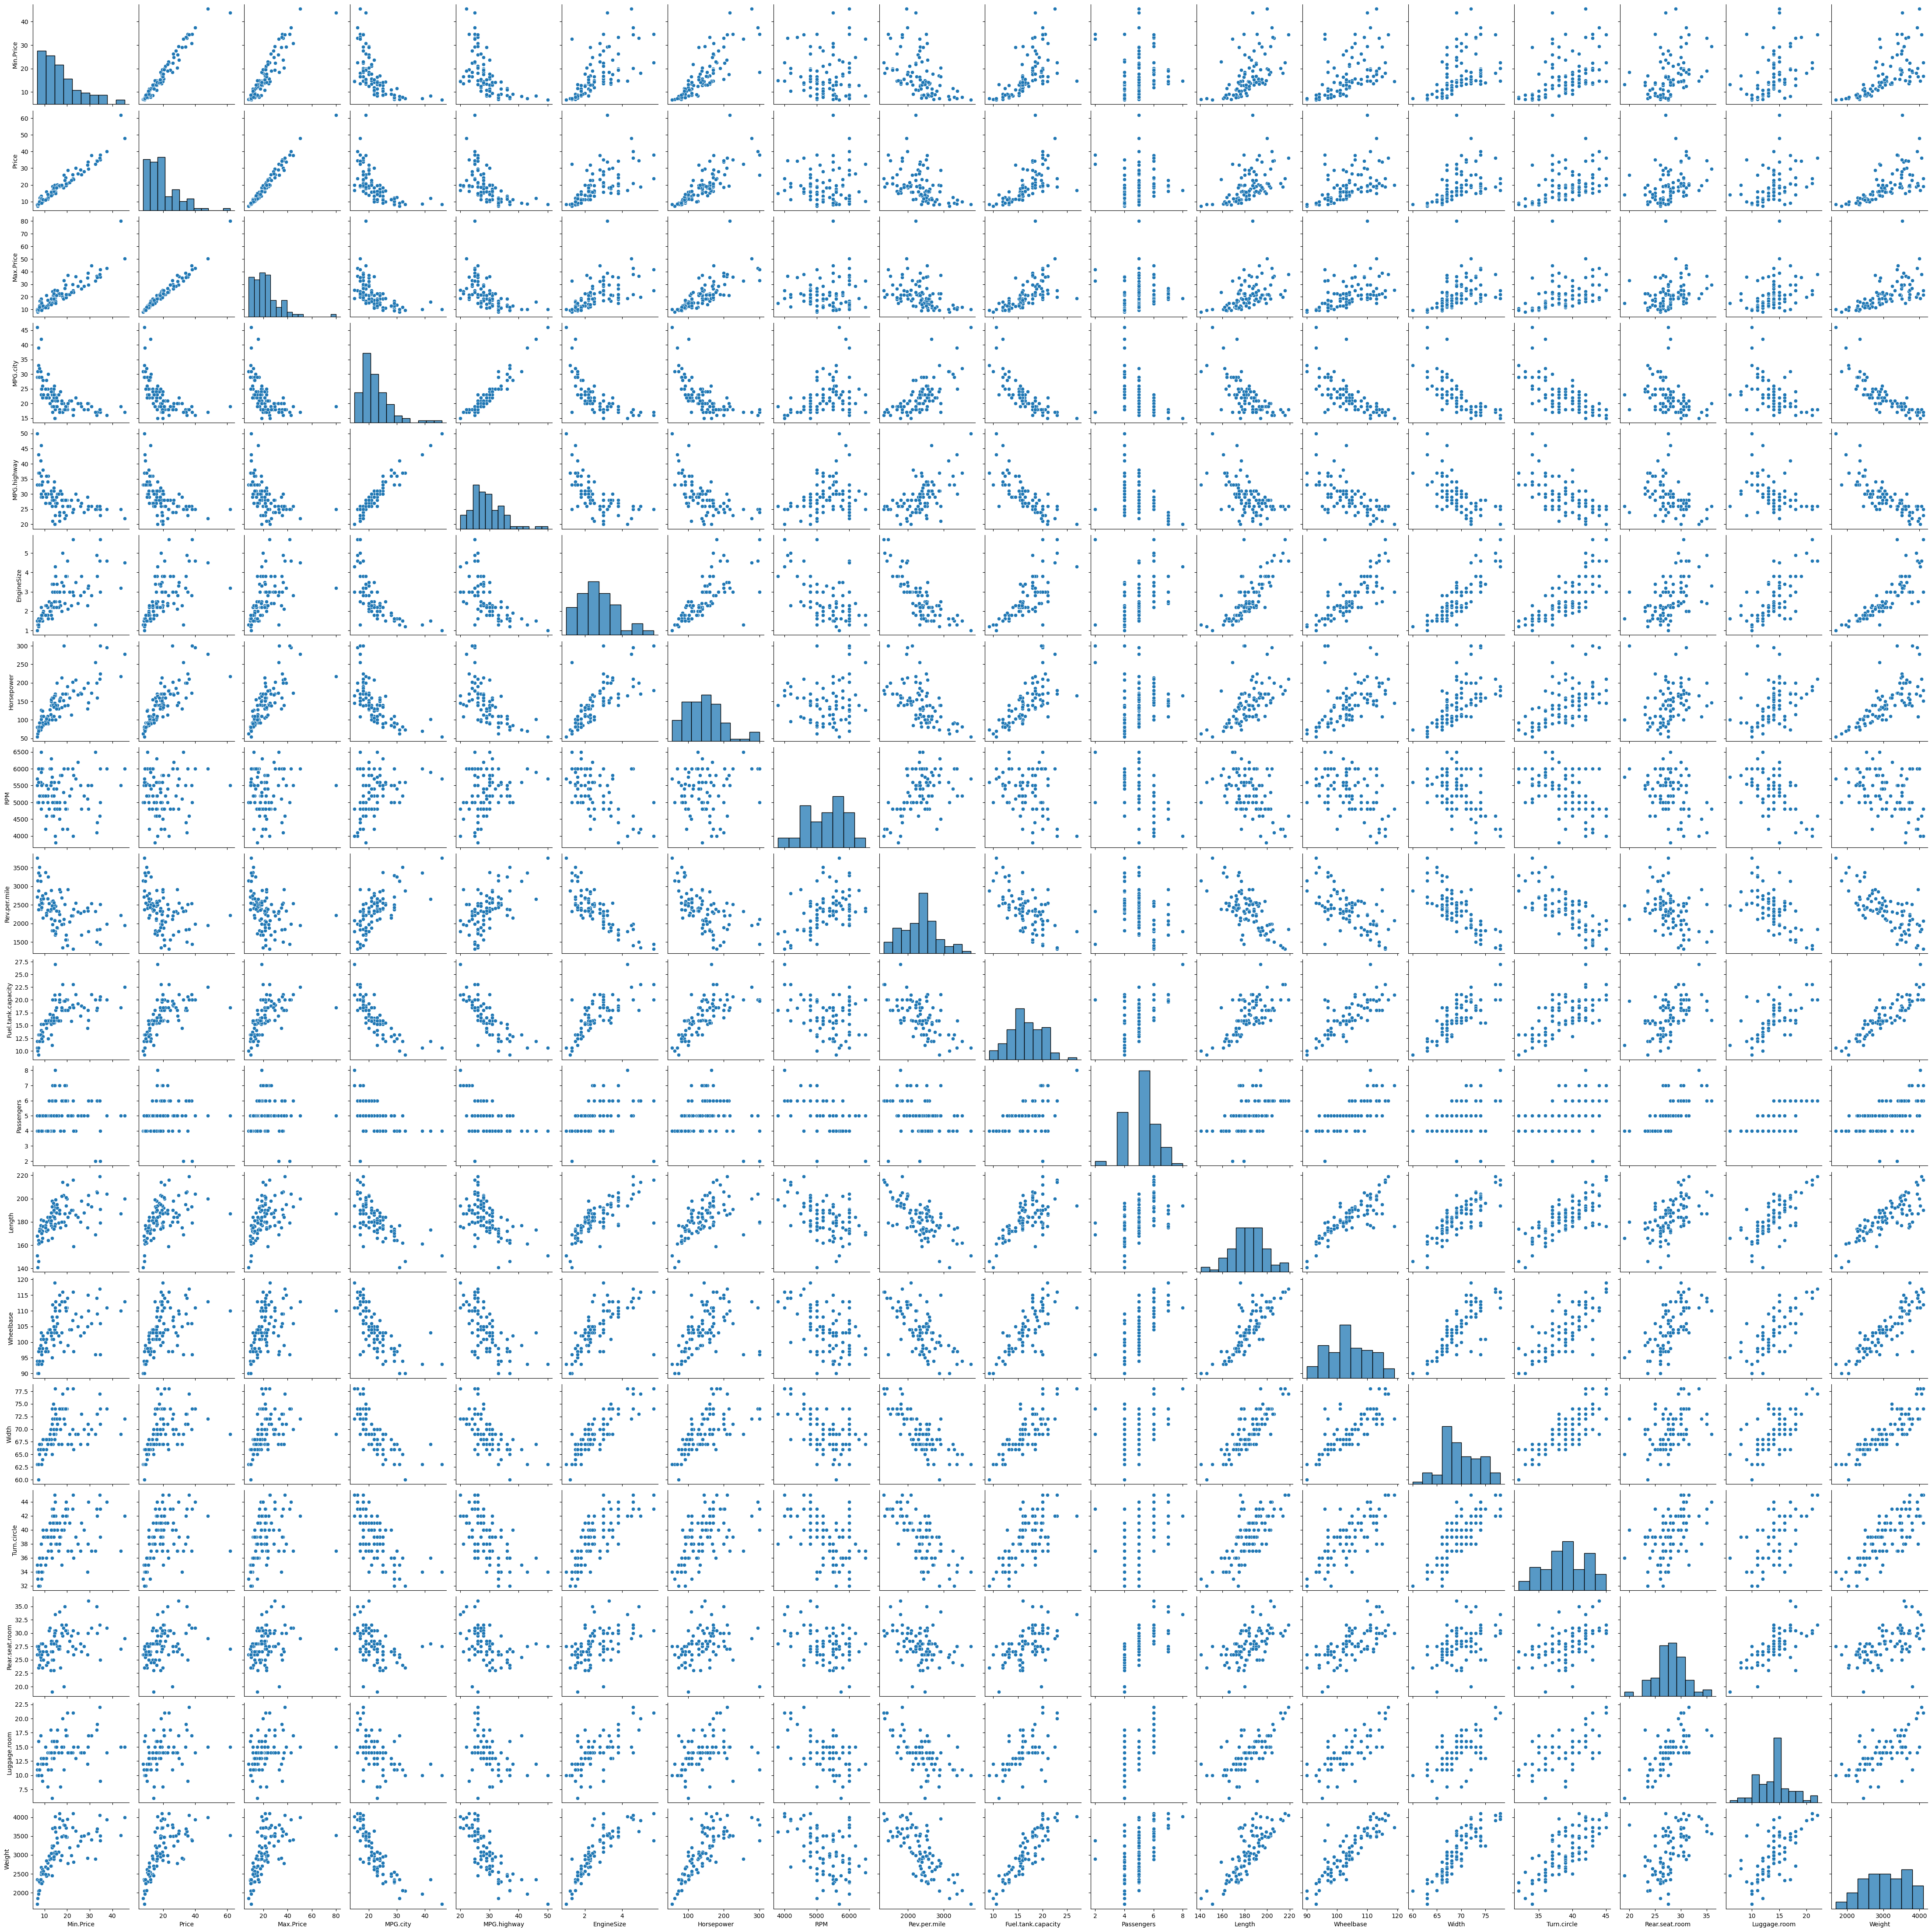

In [41]:
sns.pairplot(data=df)